# <a id='toc1_'></a>[Introduction](#toc0_)

| Name                 |  Email |
|----------------------|------------|
| Mahdi Asadolahzade   | mahdiasadi140@gmail.com   |


**Table of contents**<a id='toc0_'></a>    
- [Introduction](#toc1_)    
- [Building and Configuring a Multi-layer Neural Network](#toc2_)    
  - [Abstract](#toc2_1_)    
  - [Set Up Environment](#toc2_2_)    
  - [Define and Generate Data](#toc2_3_)    
    - [Functions](#toc2_3_1_)    
    - [Define the domain and Visualize the function](#toc2_3_2_)    
    - [linear_function](#toc2_3_3_)    
    - [sinusoidal_function](#toc2_3_4_)    
    - [complicated_function](#toc2_3_5_)    
  - [Split Data into Training and Testing Sets (linear)](#toc2_4_)    
  - [Build and Train the Neural Network (linear)](#toc2_5_)    
  - [Evaluate and Visualize Model Performance (linear)](#toc2_6_)    
    - [Actual vs. Predicted Function (linear)](#toc2_6_1_)    
    - [MAE & MSE (linear)](#toc2_6_2_)    
  - [Split Data into Training and Testing Sets (sinusoidal)](#toc2_7_)    
  - [Build and Train the Neural Network (sinusoidal)](#toc2_8_)    
  - [Evaluate and Visualize Model Performance (sinusoidal)](#toc2_9_)    
    - [Actual vs. Predicted Function (sinusoidal)](#toc2_9_1_)    
    - [MAE , MSE (sinusoidal)](#toc2_9_2_)    
  - [Split Data into Training and Testing Sets (complicated)](#toc2_10_)    
  - [Build and Train the Neural Network (complicated)](#toc2_11_)    
  - [Evaluate and Visualize Model Performance (complicated)](#toc2_12_)    
    - [Actual vs. Predicted Function (complicated)](#toc2_12_1_)    
    - [MAE , MSE (complicated)](#toc2_12_2_)    
  - [Network function](#toc2_13_)    
    - [Varying Number of Input Points](#toc2_13_1_)    
    - [Varying Complexity of Target Function](#toc2_13_2_)    
    - [Varying Number of Layers and Neurons (linear)](#toc2_13_3_)    
    - [Varying Number of Layers and Neurons (sinusoidal)](#toc2_13_4_)    
    - [Varying Number of Layers and Neurons (complicated)](#toc2_13_5_)    
- [Investigating Noise in Neural Network Performance](#toc3_)    
  - [Adding Noise to Training Data](#toc3_1_)    
  - [ Training Neural Network with Noisy Training Data](#toc3_2_)    
  - [Evaluating Network Performance with Test Data](#toc3_3_)    
    - [sinusoidal](#toc3_3_1_)    
    - [linear](#toc3_3_2_)    
    - [complicated](#toc3_3_3_)    
  - [Analysis](#toc3_4_)    
- [Function estimation using input points](#toc4_)    
  - [Data Frame](#toc4_1_)    
  - [Neural Network Training and Evaluation](#toc4_2_)    
    - [Model Architecture](#toc4_2_1_)    
    - [Model Compilation](#toc4_2_2_)    
    - [Training Process](#toc4_2_3_)    
    - [Evaluation and Analysis](#toc4_2_4_)    
      - [Performance Metrics:](#toc4_2_4_1_)    
    - [Visualization](#toc4_2_5_)    
- [Neural Network for Image Classification using Fashion-MNIST Dataset](#toc5_)    
  - [ Load and Preprocess the Dataset](#toc5_1_)    
  - [ Build the Neural Network Model](#toc5_2_)    
  - [ Train the Model](#toc5_3_)    
  - [ Evaluate the Model](#toc5_4_)    
  - [Visualize Training History](#toc5_5_)    
- [Noise Removal with Neural Networks](#toc6_)    
  - [Dataset Preparation and Noisy Data Generation](#toc6_1_)    
  - [Define Clean and Noisy Data](#toc6_2_)    
  - [Build and Train the Denoising Autoencoder](#toc6_3_)    
  - [Evaluate Denoising Performance](#toc6_4_)    
  - [Analyze Results](#toc6_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In this project, we explore the diverse applications of neural networks across various stages of data analysis, ranging from preprocessing and model training to noise analysis and denoising techniques. The goal is to leverage neural networks to address real-world data challenges and derive meaningful insights through structured experimentation.

# <a id='toc2_'></a>[Building and Configuring a Multi-layer Neural Network](#toc0_)

## <a id='toc2_1_'></a>[Abstract](#toc0_)

In this phase, we will build a *multi-layer perceptron* (MLP) neural network to approximate several functions ranging from simple (like a linear equation) to complex (like a trigonometric function) within a specified domain. We will generate data points from these functions and use a portion of these points as our training set.

## <a id='toc2_2_'></a>[Set Up Environment](#toc0_)

importing **libraries** we need

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D


## <a id='toc2_3_'></a>[Define and Generate Data](#toc0_)

Define a set of functions with inputs in one dimension (x) ranging from simple to complex. Generate data points from these functions within a specified domain

### <a id='toc2_3_1_'></a>[Functions](#toc0_)

In [2]:
def linear_function(x):
    return 2 * x + 3

def sinusoidal_function(x):
    return np.sin(x)

def complicated_function(x):
    return np.log(x**2 + 1)


### <a id='toc2_3_2_'></a>[Define the domain and Visualize the function](#toc0_)

In [3]:
np.random.seed(0) 
num_points = 100
x_train = np.random.uniform(-5, 5, num_points)


### <a id='toc2_3_3_'></a>[linear_function](#toc0_)

In [4]:

y_train_linear = linear_function(x_train) 

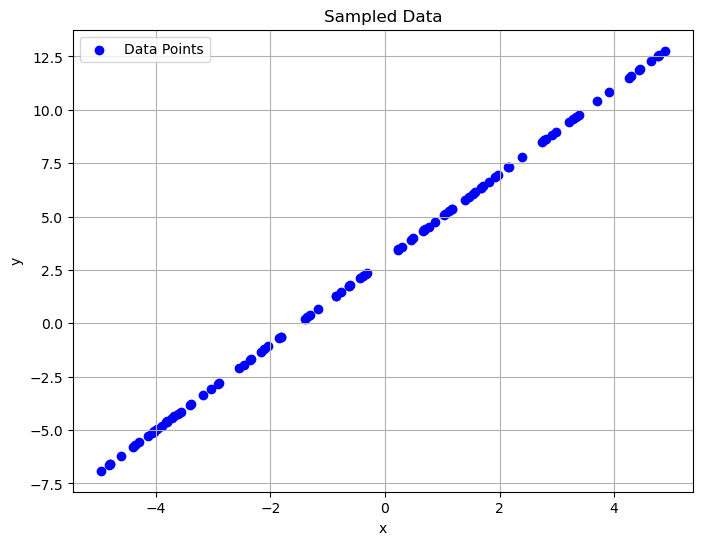

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train_linear, color='blue', label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sampled Data')
plt.legend()
plt.grid(True)
plt.show()

### <a id='toc2_3_4_'></a>[sinusoidal_function](#toc0_)

In [6]:

y_train_sinusoidal = sinusoidal_function(x_train)  

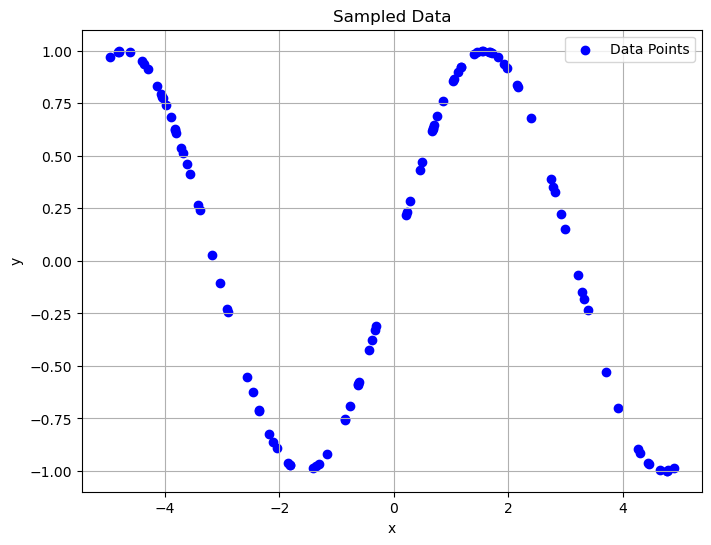

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train_sinusoidal, color='blue', label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sampled Data')
plt.legend()
plt.grid(True)
plt.show()

### <a id='toc2_3_5_'></a>[complicated_function](#toc0_)

In [8]:

y_train_complicated = complicated_function(x_train) 

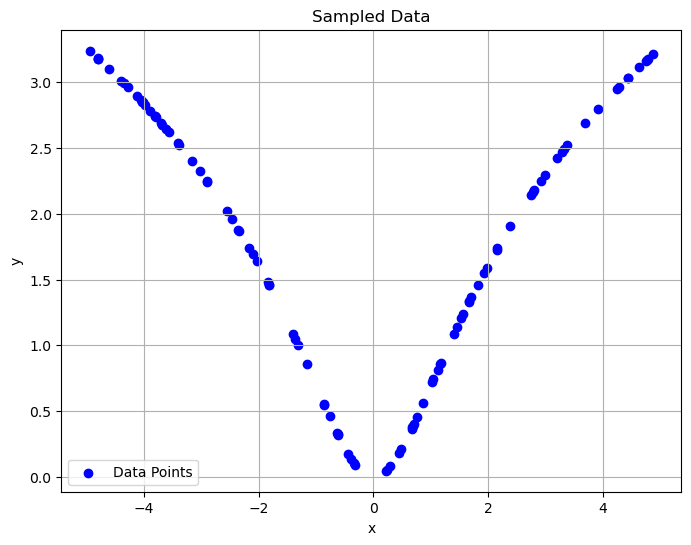

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train_complicated, color='blue', label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sampled Data')
plt.legend()
plt.grid(True)
plt.show()

## <a id='toc2_4_'></a>[Split Data into Training and Testing Sets (linear)](#toc0_)

Randomly select a portion of the generated data points as the training set.

In [10]:
np.random.seed(0) 
num_points = 100
x_train = np.random.uniform(-5, 5, num_points)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train_linear, test_size=0.2, random_state=42)

## <a id='toc2_5_'></a>[Build and Train the Neural Network (linear)](#toc0_)

Construct a multi-layer perceptron (MLP) model using TensorFlow/Keras and train it using the generated training data.

In [11]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100


c:\Users\Mahdi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 39.4679 - mae: 5.3581 - val_loss: 31.3681 - val_mae: 4.7188
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 37.8040 - mae: 5.2460 - val_loss: 29.6471 - val_mae: 4.5728
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 31.1772 - mae: 4.6756 - val_loss: 28.0926 - val_mae: 4.4341
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 29.5508 - mae: 4.5496 - val_loss: 26.5872 - val_mae: 4.3044
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 27.7671 - mae: 4.3666 - val_loss: 25.0984 - val_mae: 4.1870
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 25.7592 - mae: 4.3003 - val_loss: 23.6837 - val_mae: 4.0718
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 26.6466 - mae: 4.3419 - val_loss: 22.3817 - val_mae: 3.9616
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 22.7099 - mae: 3.9750 - val_loss: 21.1814 - val_mae: 3.8567
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 23.0545 - 

## <a id='toc2_6_'></a>[Evaluate and Visualize Model Performance (linear)](#toc0_)

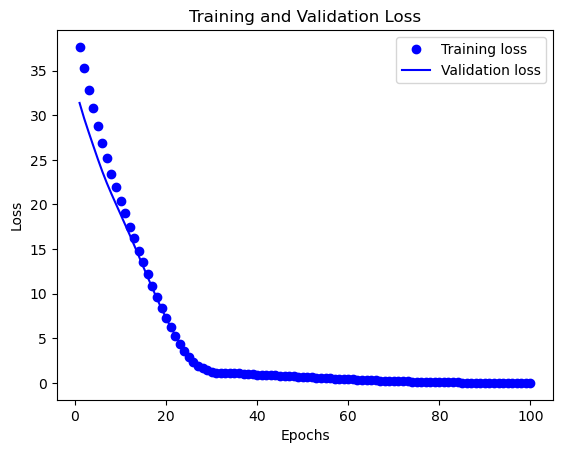

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### <a id='toc2_6_1_'></a>[Actual vs. Predicted Function (linear)](#toc0_)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


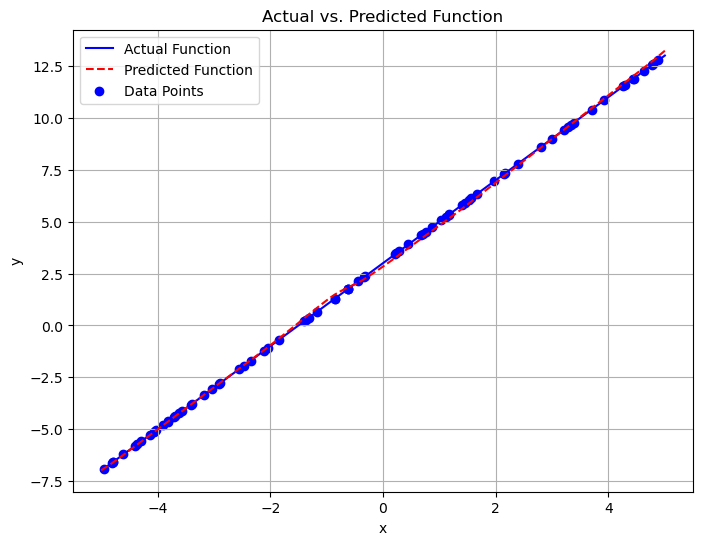

In [13]:

x_range = np.linspace(-5, 5, 100)
y_actual = linear_function(x_range)
y_predicted = model.predict(x_range)

plt.figure(figsize=(8, 6))
plt.plot(x_range, y_actual, label='Actual Function', color='blue')
plt.plot(x_range, y_predicted, label='Predicted Function', color='red', linestyle='--')
plt.scatter(x_train, y_train, color='blue', label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Actual vs. Predicted Function')
plt.legend()
plt.grid(True)
plt.show()

### <a id='toc2_6_2_'></a>[MAE & MSE (linear)](#toc0_)

In [14]:

y_predicted = np.squeeze(y_predicted)  
mae = np.mean(np.abs(y_actual - y_predicted))
print(f'Mean Absolute Error (MAE): {mae}')



Mean Absolute Error (MAE): 0.09004845462287918


In [15]:
x_test = np.linspace(0.1, 5, 50)
y_test = linear_function(x_test)
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss (MSE): {test_loss}')

Test Loss (MSE): 0.018191348761320114


## <a id='toc2_7_'></a>[Split Data into Training and Testing Sets (sinusoidal)](#toc0_)

In [16]:
np.random.seed(0) 
num_points = 100
x_train = np.random.uniform(-5, 5, num_points)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train_sinusoidal, test_size=0.2, random_state=42)

## <a id='toc2_8_'></a>[Build and Train the Neural Network (sinusoidal)](#toc0_)

In [17]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.4726 - mae: 0.6080 - val_loss: 0.6465 - val_mae: 0.7403
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4595 - mae: 0.5870 - val_loss: 0.6789 - val_mae: 0.7585
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5005 - mae: 0.6127 - val_loss: 0.6641 - val_mae: 0.7586
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4279 - mae: 0.5689 - val_loss: 0.6596 - val_mae: 0.7562
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4410 - mae: 0.5735 - val_loss: 0.6461 - val_mae: 0.7451
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4391 - mae: 0.5771 - val_loss: 0.6308 - val_mae: 0.7369
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4180 - mae: 0.5623 - val_loss: 0.6169 - val_mae: 0.7267
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4078 - mae: 0.5516 - val_loss: 0.5929 - val_mae: 0.7145
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4167 - mae: 

## <a id='toc2_9_'></a>[Evaluate and Visualize Model Performance (sinusoidal)](#toc0_)

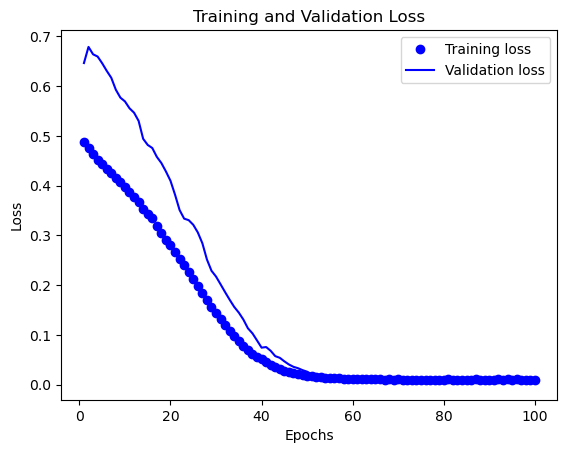

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### <a id='toc2_9_1_'></a>[Actual vs. Predicted Function (sinusoidal)](#toc0_)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


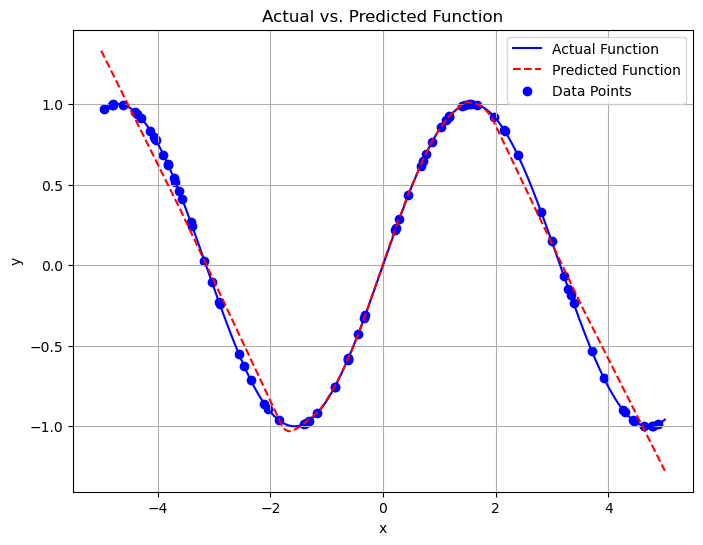

In [19]:
x_range = np.linspace(-5, 5, 1000)
y_actual = sinusoidal_function(x_range)
y_predicted = model.predict(x_range)

plt.figure(figsize=(8, 6))
plt.plot(x_range, y_actual, label='Actual Function', color='blue')
plt.plot(x_range, y_predicted, label='Predicted Function', color='red', linestyle='--')
plt.scatter(x_train, y_train, color='blue', label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Actual vs. Predicted Function')
plt.legend()
plt.grid(True)
plt.show()

### <a id='toc2_9_2_'></a>[MAE , MSE (sinusoidal)](#toc0_)

In [20]:

y_predicted = np.squeeze(y_predicted)  
mae = np.mean(np.abs(y_actual - y_predicted))
print(f'Mean Absolute Error (MAE): {mae}')



Mean Absolute Error (MAE): 0.06445569229047167


In [21]:
x_test = np.linspace(0.1, 5, 50)
y_test = sinusoidal_function(x_test)
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss (MSE): {test_loss}')

Test Loss (MSE): 0.009555906057357788


## <a id='toc2_10_'></a>[Split Data into Training and Testing Sets (complicated)](#toc0_)

In [22]:
np.random.seed(0) 
num_points = 100
x_train = np.random.uniform(-5, 5, num_points)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train_complicated, test_size=0.2, random_state=42)

## <a id='toc2_11_'></a>[Build and Train the Neural Network (complicated)](#toc0_)

In [23]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 4.9959 - mae: 1.9220 - val_loss: 2.4807 - val_mae: 1.3455
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.5662 - mae: 1.6252 - val_loss: 1.8237 - val_mae: 1.1471
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.7663 - mae: 1.4541 - val_loss: 1.3022 - val_mae: 0.9641
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8168 - mae: 1.1580 - val_loss: 0.9048 - val_mae: 0.8023
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.2002 - mae: 0.9377 - val_loss: 0.5968 - val_mae: 0.6510
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7634 - mae: 0.7581 - val_loss: 0.3650 - val_mae: 0.5144
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4400 - mae: 0.5757 - val_loss: 0.2044 - val_mae: 0.3974
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1959 - mae: 0.3934 - val_loss: 0.1050 - val_mae: 0.2926
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0948 - mae: 0

## <a id='toc2_12_'></a>[Evaluate and Visualize Model Performance (complicated)](#toc0_)

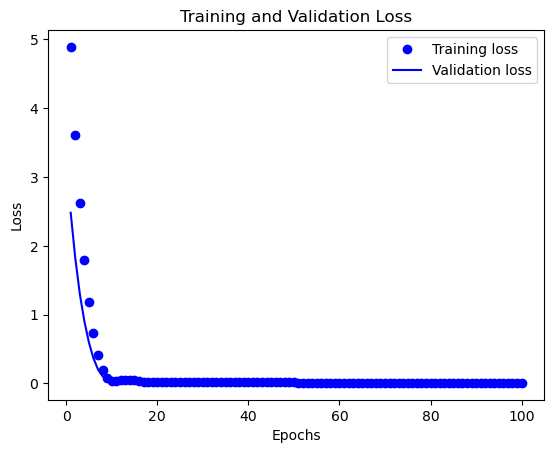

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### <a id='toc2_12_1_'></a>[Actual vs. Predicted Function (complicated)](#toc0_)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


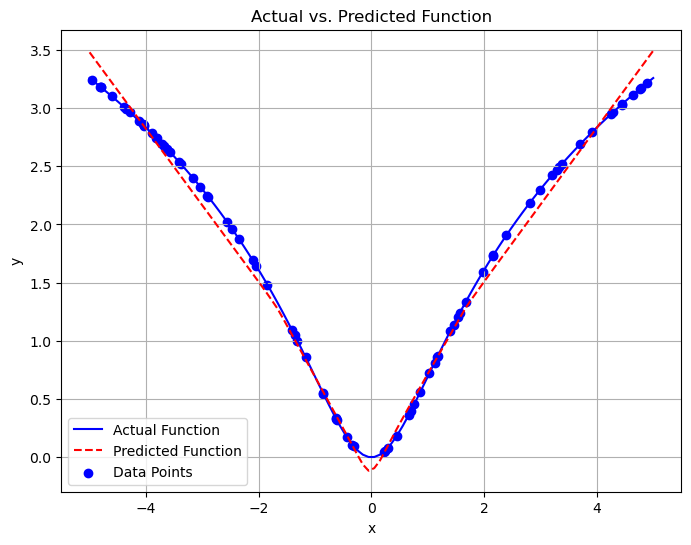

In [25]:
x_range = np.linspace(-5, 5, 100)
y_actual = complicated_function(x_range)
y_predicted = model.predict(x_range)

plt.figure(figsize=(8, 6))
plt.plot(x_range, y_actual, label='Actual Function', color='blue')
plt.plot(x_range, y_predicted, label='Predicted Function', color='red', linestyle='--')
plt.scatter(x_train, y_train, color='blue', label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Actual vs. Predicted Function')
plt.legend()
plt.grid(True)
plt.show()

### <a id='toc2_12_2_'></a>[MAE , MSE (complicated)](#toc0_)

In [26]:

y_predicted = np.squeeze(y_predicted)  
mae = np.mean(np.abs(y_actual - y_predicted))
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 0.08308614802300479


In [27]:
x_test = np.linspace(0.1, 5, 50)
y_test = complicated_function(x_test)
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss (MSE): {test_loss}')

Test Loss (MSE): 0.009957339614629745


## <a id='toc2_13_'></a>[Network function](#toc0_)

### <a id='toc2_13_1_'></a>[Varying Number of Input Points](#toc0_)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/stepWARNING:tensorflow:6 out of the last 40 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000024DBE1FEF20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


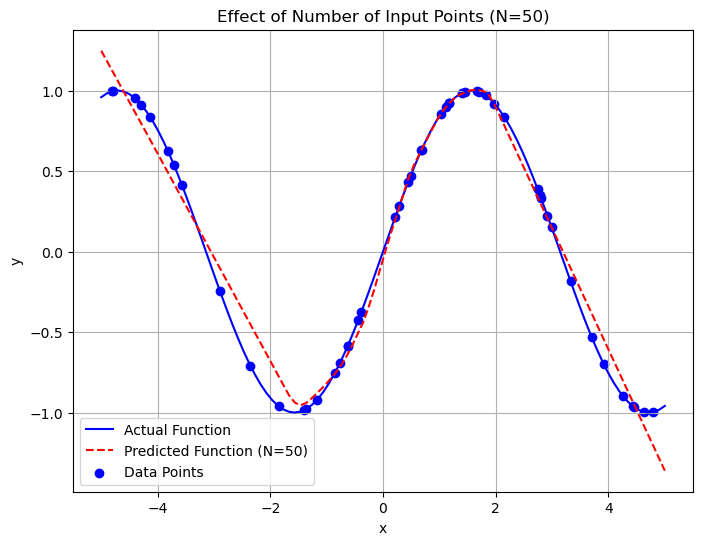

Test Loss (MSE): 0.010831722989678383
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


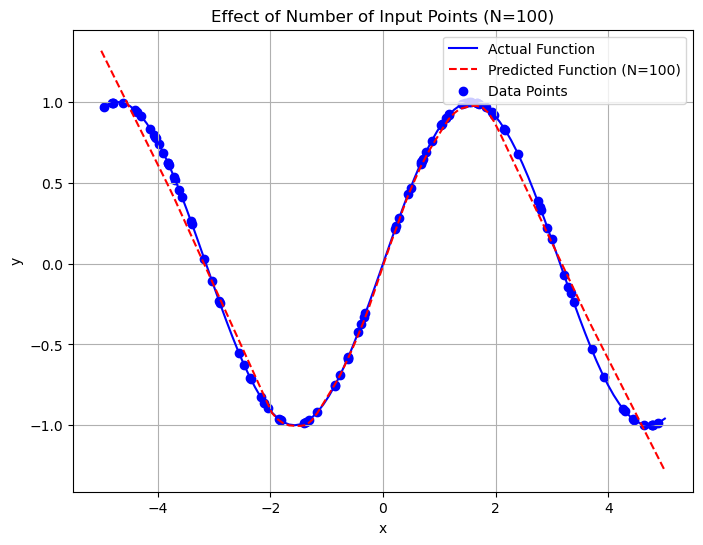

Test Loss (MSE): 0.0094144307076931
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


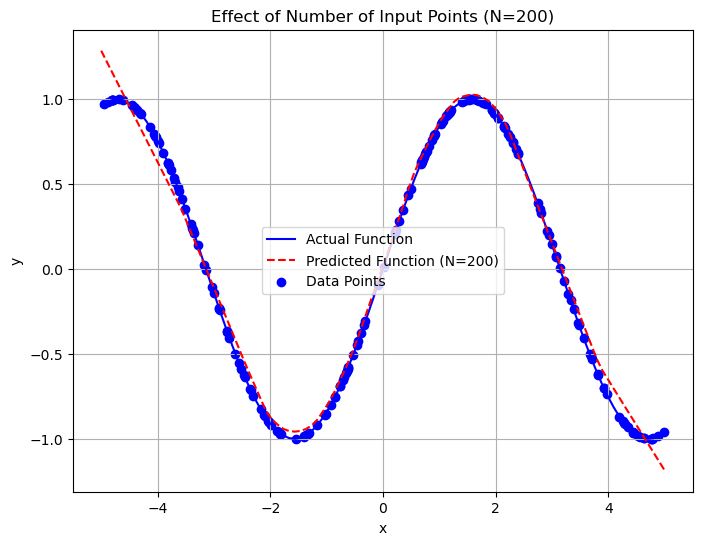

Test Loss (MSE): 0.003951942548155785


In [28]:


# Define a sample function (e.g., sinusoidal)
def cosusoidal_function(x):
    return np.cos(x)

# Generate different numbers of input points
num_points_list = [50, 100, 200]

for num_points in num_points_list:
    # Generate training data
    np.random.seed(0)
    x_train = np.random.uniform(-5, 5, num_points)
    y_train = sinusoidal_function(x_train)

    # Build and train the model
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(1,)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    history = model.fit(x_train, y_train, epochs=100, verbose=0)

    # Evaluate and plot results
    x_range = np.linspace(-5, 5, 100)
    y_actual = sinusoidal_function(x_range)
    y_predicted = model.predict(x_range)

    plt.figure(figsize=(8, 6))
    plt.plot(x_range, y_actual, label='Actual Function', color='blue')
    plt.plot(x_range, y_predicted, label=f'Predicted Function (N={num_points})', color='red', linestyle='--')
    plt.scatter(x_train, y_train, color='blue', label='Data Points')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Effect of Number of Input Points (N={num_points})')
    plt.legend()
    plt.grid(True)
    plt.show()

    x_test = np.linspace(0.1, 5, 50)
    y_test = sinusoidal_function(x_test)
    test_loss, test_mae = model.evaluate(x_test, y_test, verbose=0)
    print(f'Test Loss (MSE): {test_loss}')


Number of Input Points: As we increase the number of input **points** (N), the model tends to fit the data more closely, capturing the underlying function more accurately

### <a id='toc2_13_2_'></a>[Varying Complexity of Target Function](#toc0_)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


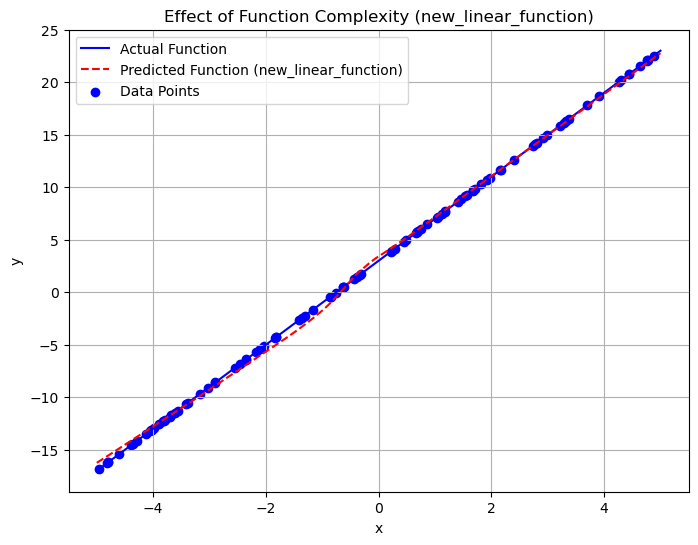

Test Loss (MSE): 0.022746514528989792
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


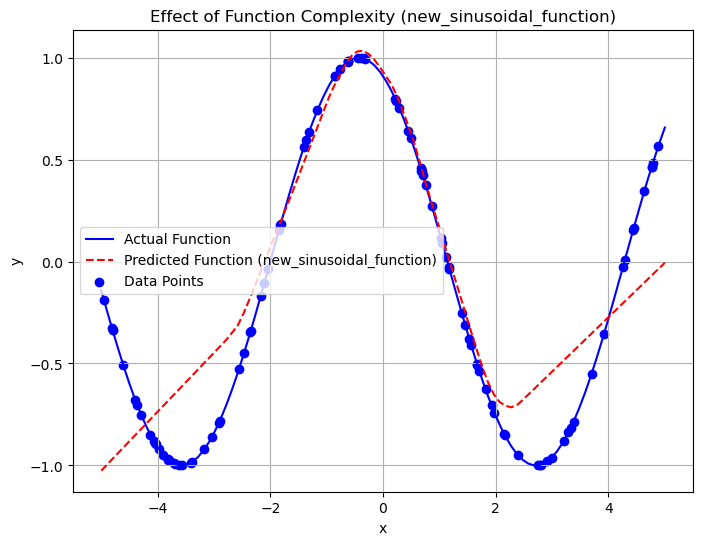

Test Loss (MSE): 0.07341403514146805
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


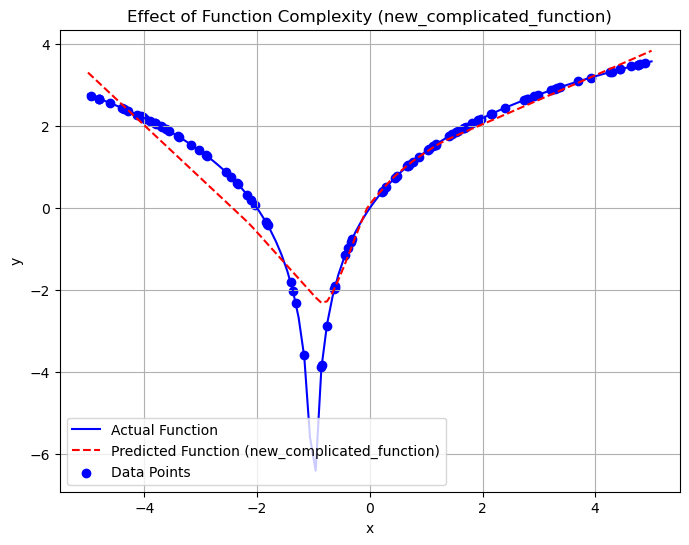

Test Loss (MSE): 0.013267316855490208


In [29]:
# Define simple and complex functions
def new_linear_function(x):
    return 4 * x + 3

def new_sinusoidal_function(x):
    return np.sin(x+2)


def new_complicated_function(x):
    return np.log(x**2 + 2*x+1)

# Generate training data for different functions
functions = [new_linear_function, new_sinusoidal_function, new_complicated_function]

for func in functions:
    # Generate training data
    np.random.seed(0)
    x_train = np.random.uniform(-5, 5, 100)
    y_train = func(x_train)

    # Build and train the model
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(1,)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    history = model.fit(x_train, y_train, epochs=100, verbose=0)

    # Evaluate and plot results
    x_range = np.linspace(-5, 5, 100)
    y_actual = func(x_range)
    y_predicted = model.predict(x_range)

    plt.figure(figsize=(8, 6))
    plt.plot(x_range, y_actual, label='Actual Function', color='blue')
    plt.plot(x_range, y_predicted, label=f'Predicted Function ({func.__name__})', color='red', linestyle='--')
    plt.scatter(x_train, y_train, color='blue', label='Data Points')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Effect of Function Complexity ({func.__name__})')
    plt.legend()
    plt.grid(True)
    plt.show()

    x_test = np.linspace(0.1, 5, 50)
    y_test = func(x_test)
    test_loss, test_mae = model.evaluate(x_test, y_test, verbose=0)
    print(f'Test Loss (MSE): {test_loss}')


Complexity of Target Function: More complex functions (e.g., complicated_function) may require deeper or differently structured networks to accurately capture their behavior.

### <a id='toc2_13_3_'></a>[Varying Number of Layers and Neurons (linear)](#toc0_)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


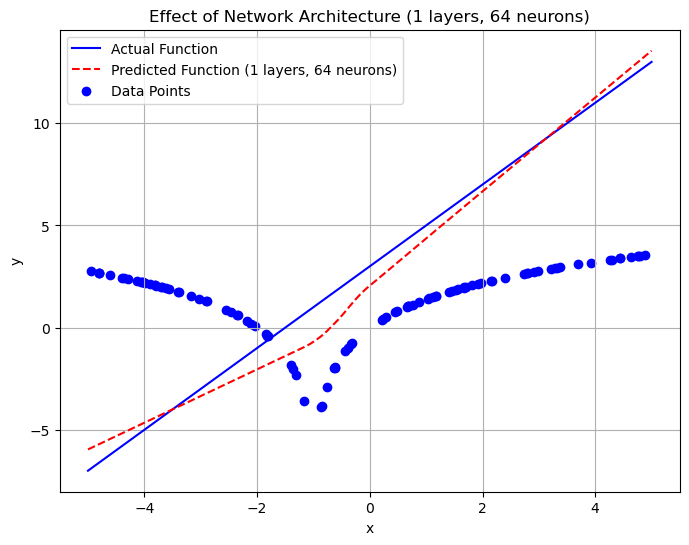

Test Loss (MSE): 0.21619276702404022
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


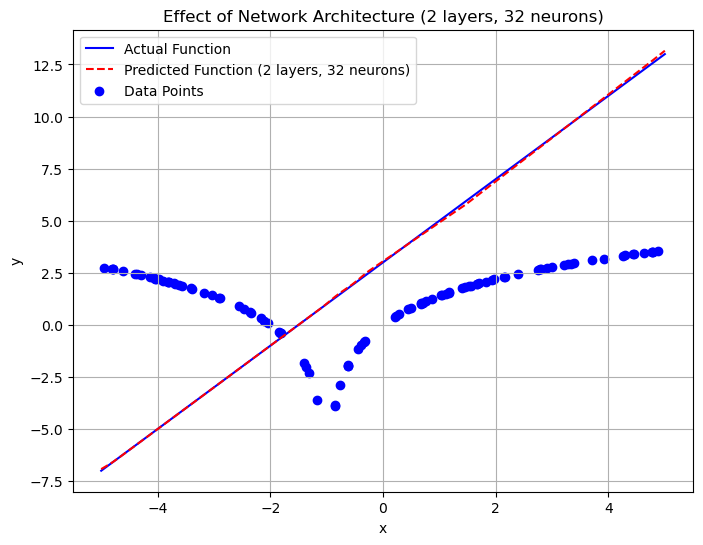

Test Loss (MSE): 0.0075163464061915874
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


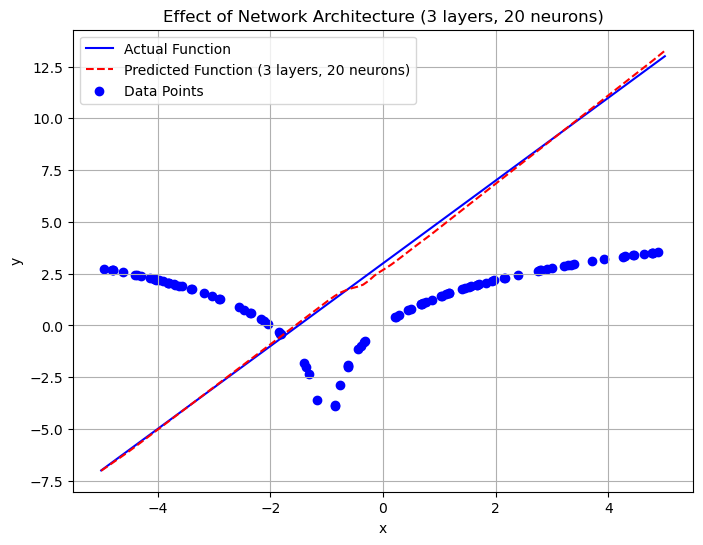

Test Loss (MSE): 0.04090062156319618
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


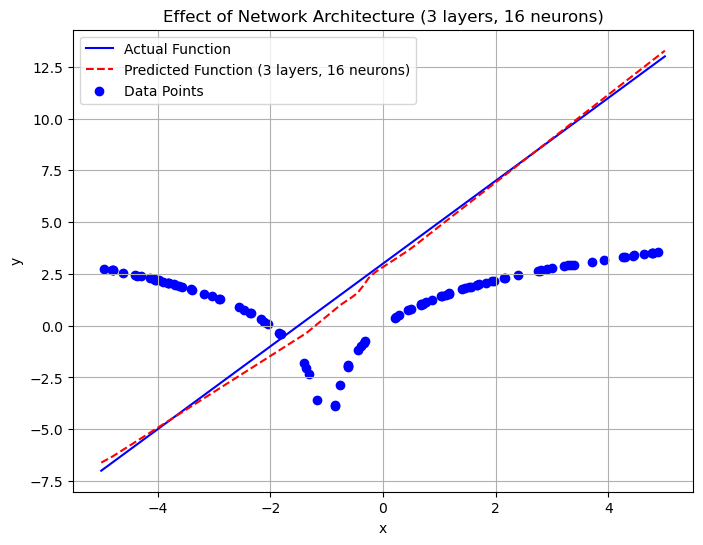

Test Loss (MSE): 0.02696695737540722
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


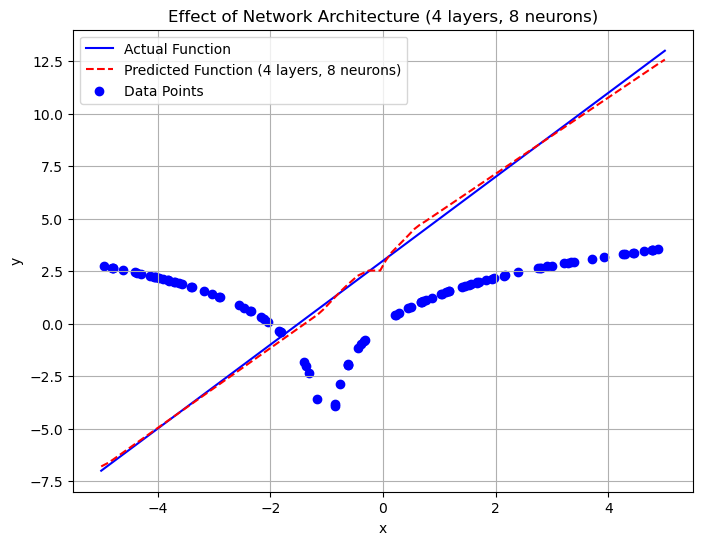

Test Loss (MSE): 0.057555828243494034


In [30]:
# Define a function to create and train models with different architectures
def train_model(num_layers, num_neurons):
    # Generate training data
    np.random.seed(0)
    x_train = np.random.uniform(-5, 5, 100)
    y_train = linear_function(x_train)

    # Build and train the model
    model = keras.Sequential()
    model.add(keras.layers.Dense(num_neurons, activation='relu', input_shape=(1,)))
    
    for _ in range(num_layers - 1):
        model.add(keras.layers.Dense(num_neurons, activation='relu'))
    
    model.add(keras.layers.Dense(1))
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    history = model.fit(x_train, y_train, epochs=100, verbose=0)
    
    return model

# Test different architectures
architectures = [(1, 64), (2, 32),(3,20), (3, 16),(4,8)]

for layers, neurons in architectures:
    model = train_model(layers, neurons)

    # Evaluate and plot results
    x_range = np.linspace(-5, 5, 100)
    y_actual = linear_function(x_range)
    y_predicted = model.predict(x_range)

    plt.figure(figsize=(8, 6))
    plt.plot(x_range, y_actual, label='Actual Function', color='blue')
    plt.plot(x_range, y_predicted, label=f'Predicted Function ({layers} layers, {neurons} neurons)', color='red', linestyle='--')
    plt.scatter(x_train, y_train, color='blue', label='Data Points')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Effect of Network Architecture ({layers} layers, {neurons} neurons)')
    plt.legend()
    plt.grid(True)
    plt.show()

    x_test = np.linspace(0.1, 5, 50)
    y_test = linear_function(x_test)
    test_loss, test_mae = model.evaluate(x_test, y_test, verbose=0)
    print(f'Test Loss (MSE): {test_loss}')


### <a id='toc2_13_4_'></a>[Varying Number of Layers and Neurons (sinusoidal)](#toc0_)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


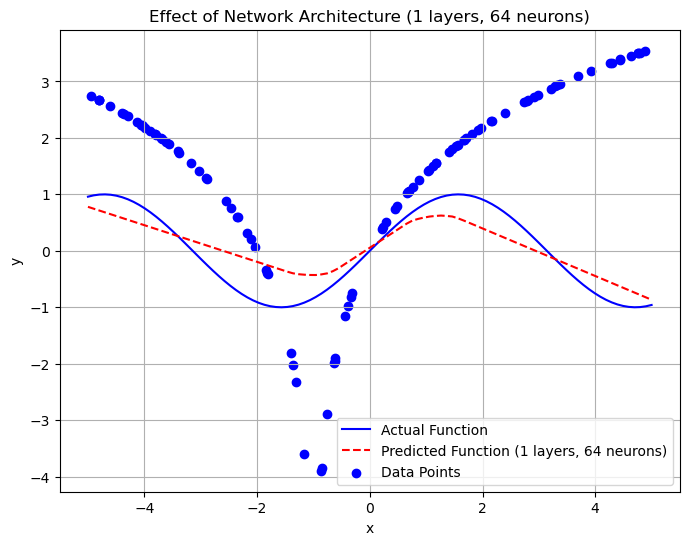

Test Loss (MSE): 0.09151393920183182
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


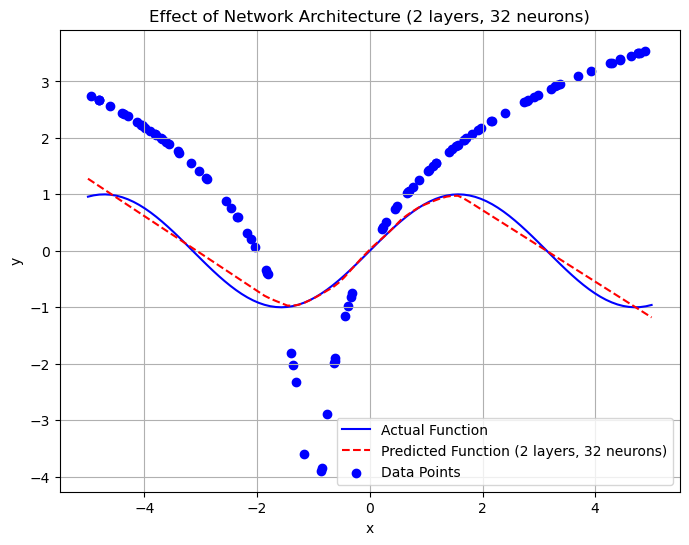

Test Loss (MSE): 0.016277417540550232
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


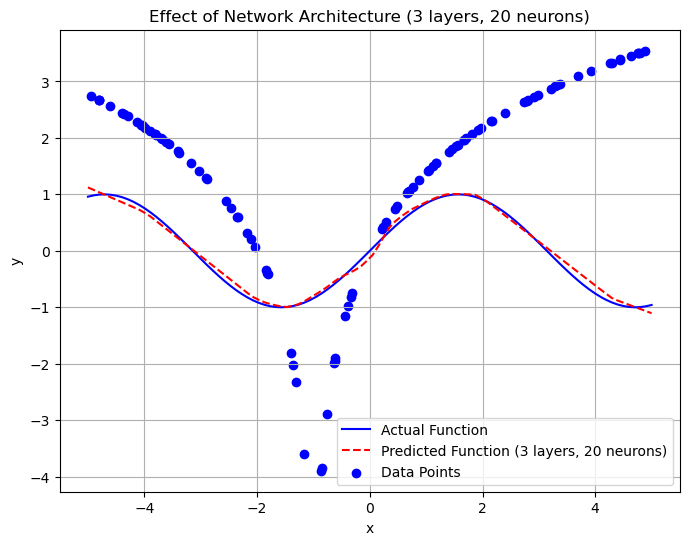

Test Loss (MSE): 0.005629471968859434
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


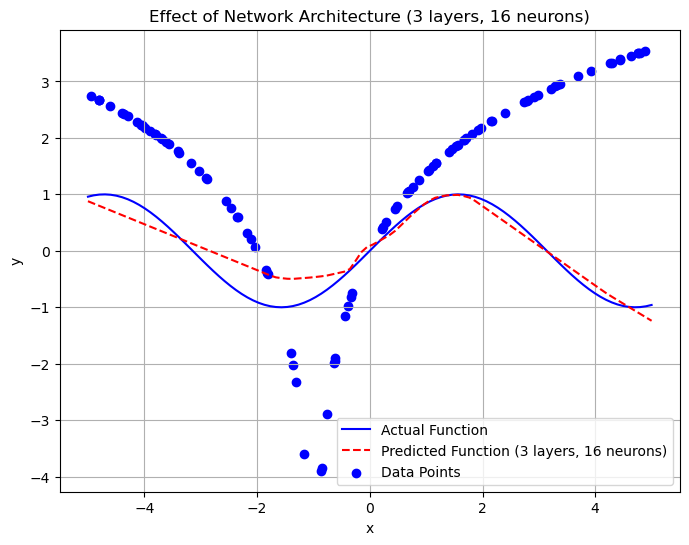

Test Loss (MSE): 0.01031306479126215
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


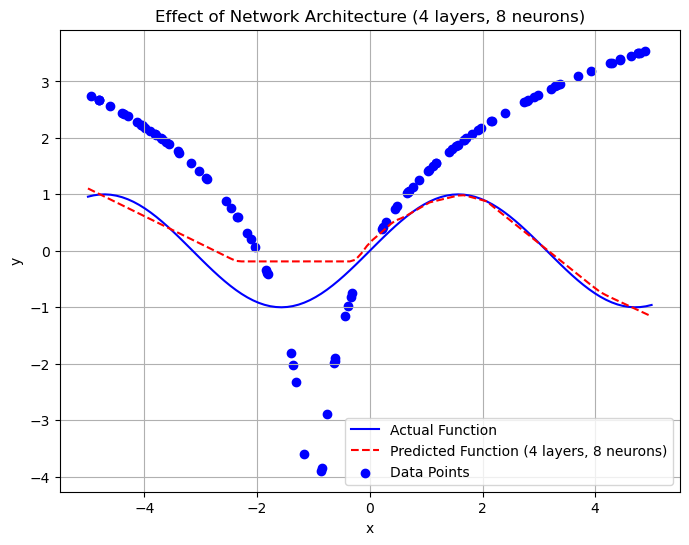

Test Loss (MSE): 0.005127677693963051


In [31]:
# Define a function to create and train models with different architectures
def train_model(num_layers, num_neurons):
    # Generate training data
    np.random.seed(0)
    x_train = np.random.uniform(-5, 5, 100)
    y_train = sinusoidal_function(x_train)

    # Build and train the model
    model = keras.Sequential()
    model.add(keras.layers.Dense(num_neurons, activation='relu', input_shape=(1,)))
    
    for _ in range(num_layers - 1):
        model.add(keras.layers.Dense(num_neurons, activation='relu'))
    
    model.add(keras.layers.Dense(1))
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    history = model.fit(x_train, y_train, epochs=100, verbose=0)
    
    return model

# Test different architectures
architectures = [(1, 64), (2, 32),(3,20), (3, 16),(4,8)]

for layers, neurons in architectures:
    model = train_model(layers, neurons)

    # Evaluate and plot results
    x_range = np.linspace(-5, 5, 100)
    y_actual = sinusoidal_function(x_range)
    y_predicted = model.predict(x_range)

    plt.figure(figsize=(8, 6))
    plt.plot(x_range, y_actual, label='Actual Function', color='blue')
    plt.plot(x_range, y_predicted, label=f'Predicted Function ({layers} layers, {neurons} neurons)', color='red', linestyle='--')
    plt.scatter(x_train, y_train, color='blue', label='Data Points')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Effect of Network Architecture ({layers} layers, {neurons} neurons)')
    plt.legend()
    plt.grid(True)
    plt.show()

    x_test = np.linspace(0.1, 5, 50)
    y_test = sinusoidal_function(x_test)
    test_loss, test_mae = model.evaluate(x_test, y_test, verbose=0)
    print(f'Test Loss (MSE): {test_loss}')


### <a id='toc2_13_5_'></a>[Varying Number of Layers and Neurons (complicated)](#toc0_)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


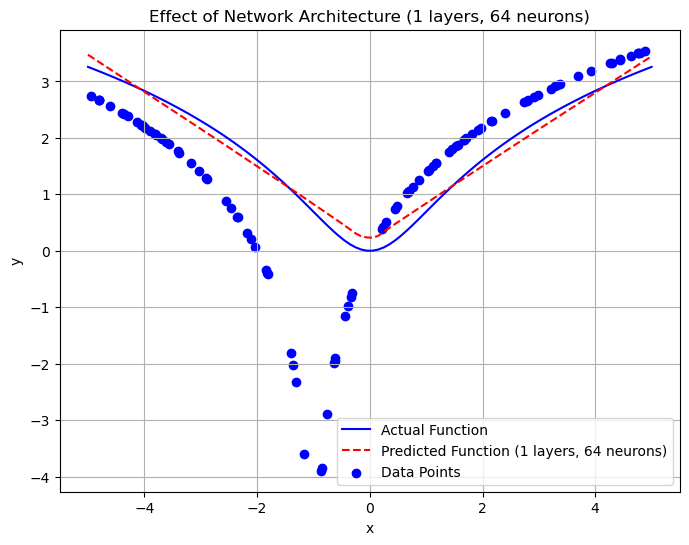

Test Loss (MSE): 0.021739527583122253
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


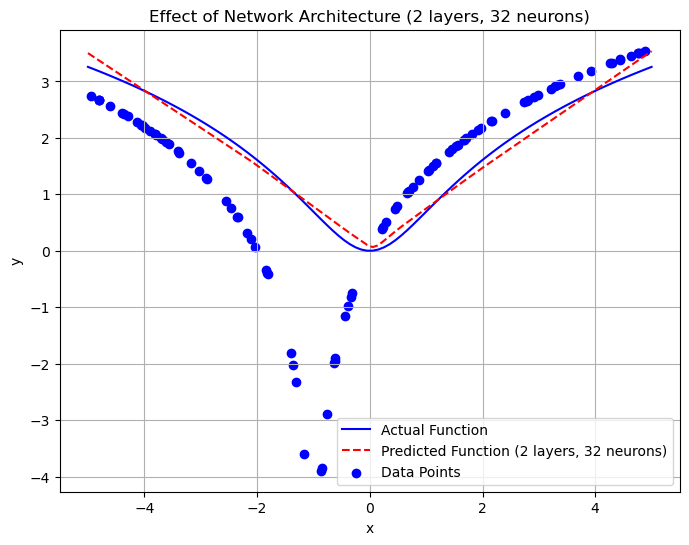

Test Loss (MSE): 0.016540419310331345
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


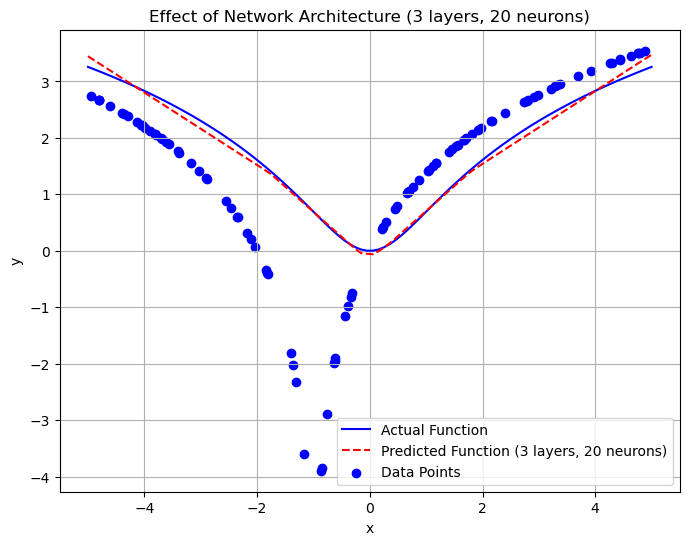

Test Loss (MSE): 0.0073663461953401566
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


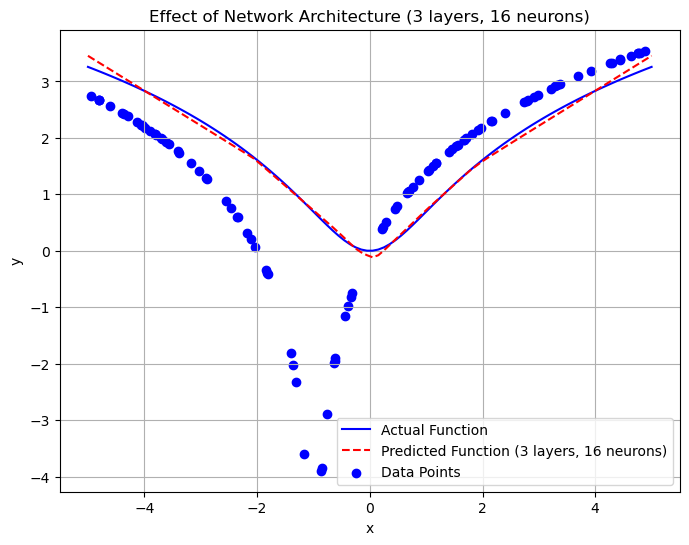

Test Loss (MSE): 0.005080488510429859
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


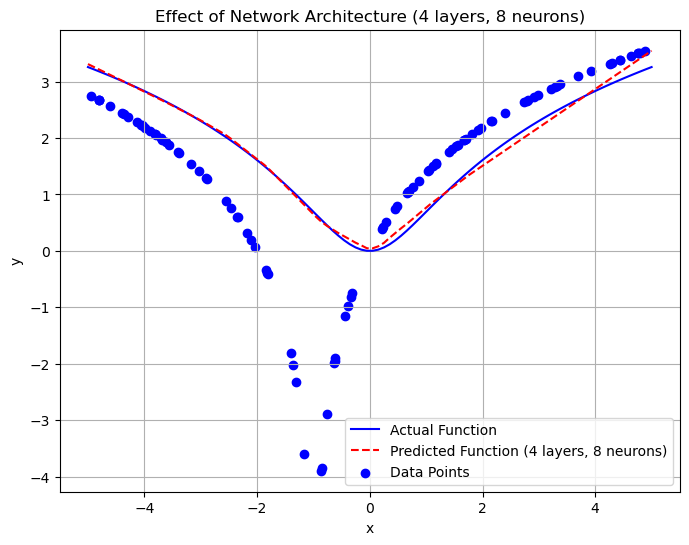

Test Loss (MSE): 0.013431170023977757


In [32]:
# Define a function to create and train models with different architectures
def train_model(num_layers, num_neurons):
    # Generate training data
    np.random.seed(0)
    x_train = np.random.uniform(-5, 5, 100)
    y_train = complicated_function(x_train)

    # Build and train the model
    model = keras.Sequential()
    model.add(keras.layers.Dense(num_neurons, activation='relu', input_shape=(1,)))
    
    for _ in range(num_layers - 1):
        model.add(keras.layers.Dense(num_neurons, activation='relu'))
    
    model.add(keras.layers.Dense(1))
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    history = model.fit(x_train, y_train, epochs=100, verbose=0)
    
    return model

# Test different architectures
architectures = [(1, 64), (2, 32),(3,20), (3, 16),(4,8)]

for layers, neurons in architectures:
    model = train_model(layers, neurons)

    # Evaluate and plot results
    x_range = np.linspace(-5, 5, 100)
    y_actual = complicated_function(x_range)
    y_predicted = model.predict(x_range)

    plt.figure(figsize=(8, 6))
    plt.plot(x_range, y_actual, label='Actual Function', color='blue')
    plt.plot(x_range, y_predicted, label=f'Predicted Function ({layers} layers, {neurons} neurons)', color='red', linestyle='--')
    plt.scatter(x_train, y_train, color='blue', label='Data Points')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Effect of Network Architecture ({layers} layers, {neurons} neurons)')
    plt.legend()
    plt.grid(True)
    plt.show()

    x_test = np.linspace(0.1, 5, 50)
    y_test = complicated_function(x_test)
    test_loss, test_mae = model.evaluate(x_test, y_test, verbose=0)
    print(f'Test Loss (MSE): {test_loss}')


Number of Layers and Neurons: Deeper networks (more layers) or wider networks (more neurons per layer) can potentially capture more complex patterns in the data but may also lead to overfitting if not properly regularized.

# <a id='toc3_'></a>[Investigating Noise in Neural Network Performance](#toc0_)

In this phase, we'll add various levels of noise to the data points generated in the previous section and observe how the neural network model handles this noise. Our goal is to report the network's performance across different levels of noise, ranging from minimal to substantial, and analyze its ability to maintain accuracy in the presence of noise.

## <a id='toc3_1_'></a>[Adding Noise to Training Data](#toc0_)

First, we will add different levels of noise to the training data points. We will use a normal distribution to generate the noise, ranging from values close to zero (low noise) to larger values (high noise).

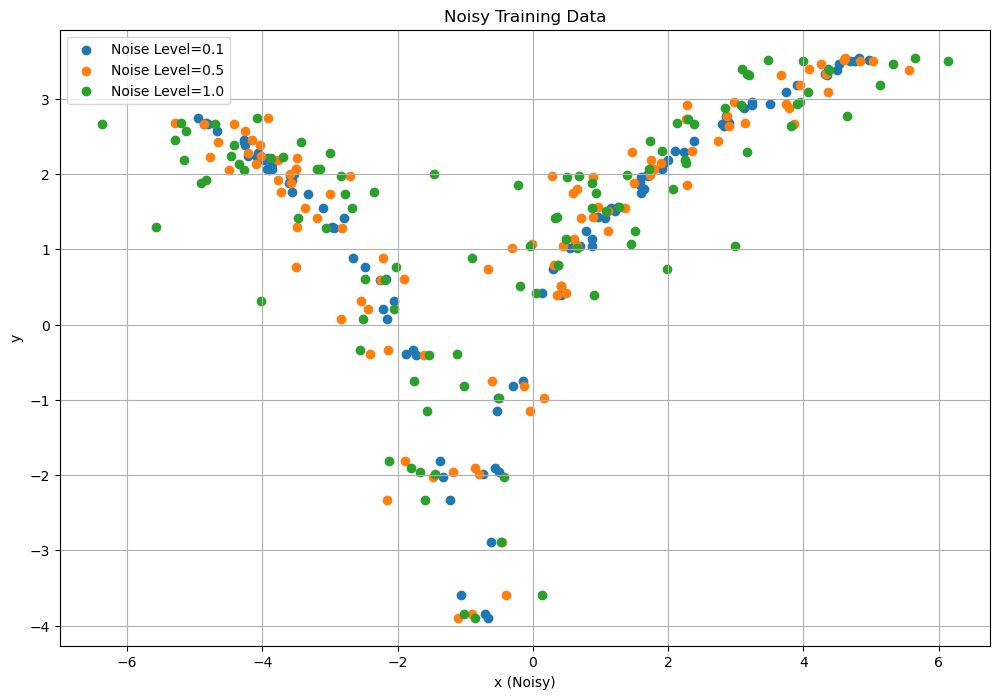

In [33]:

# Define a function to add noise to data
def add_noise(data, noise_level):
    noisy_data = data + np.random.normal(0, noise_level, size=data.shape)
    return noisy_data

# Generate noisy training data
noise_levels = [0.1, 0.5, 1.0]  # Different noise levels
x_noisy_train_list = []

for noise_level in noise_levels:
    x_noisy_train = add_noise(x_train, noise_level)
    x_noisy_train_list.append(x_noisy_train)

# Visualize training data with noise
plt.figure(figsize=(12, 8))
for i, x_noisy_train in enumerate(x_noisy_train_list):
    plt.scatter(x_noisy_train, y_train, label=f'Noise Level={noise_levels[i]}')
plt.xlabel('x (Noisy)')
plt.ylabel('y')
plt.title('Noisy Training Data')
plt.legend()
plt.grid(True)
plt.show()


## <a id='toc3_2_'></a>[ Training Neural Network with Noisy Training Data](#toc0_)

Next, we will train neural network models using the noisy training data and examine their performance.

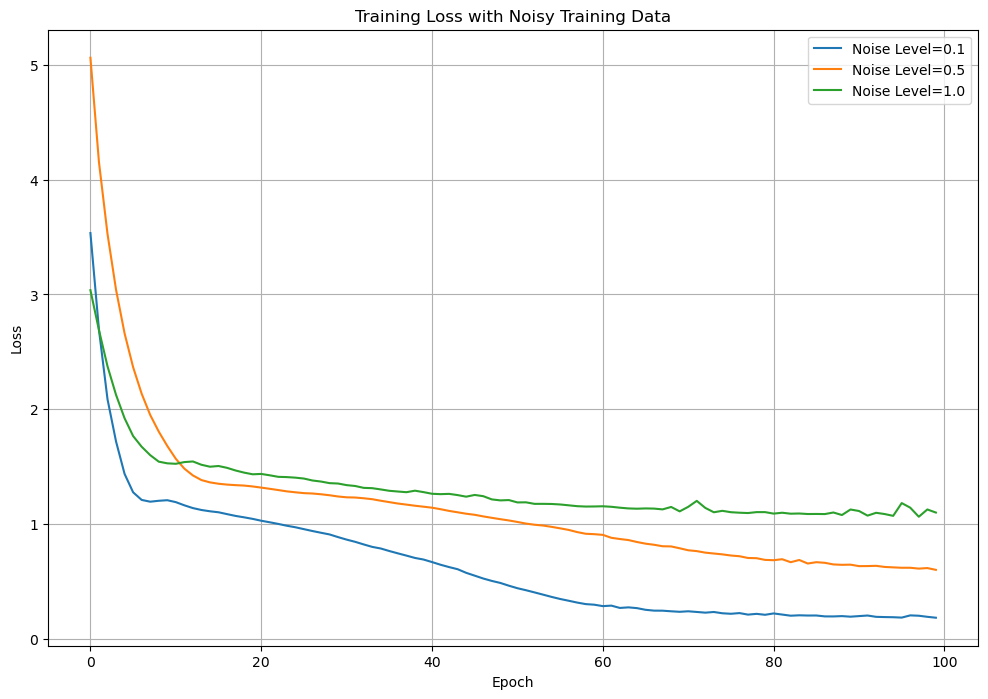

In [34]:
# Train models with noisy training data
models = []
histories = []

for i, x_noisy_train in enumerate(x_noisy_train_list):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(1,)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    history = model.fit(x_noisy_train, y_train, epochs=100, verbose=0)
    models.append(model)
    histories.append(history)

# Plot training loss for each noise level
plt.figure(figsize=(12, 8))
for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label=f'Noise Level={noise_levels[i]}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss with Noisy Training Data')
plt.legend()
plt.grid(True)
plt.show()


## <a id='toc3_3_'></a>[Evaluating Network Performance with Test Data](#toc0_)

### <a id='toc3_3_1_'></a>[sinusoidal](#toc0_)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1949 - mae: 1.4338 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8063 - mae: 1.2843 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2500 - mae: 1.1343 


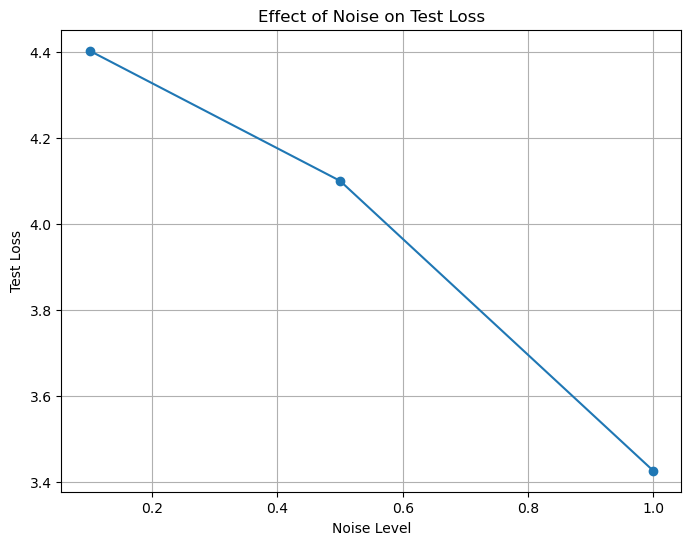

In [35]:

# Define a function to evaluate model performance on test data
def evaluate_model(model, x_test, y_test):
    loss, _ = model.evaluate(x_test, y_test)
    return loss

# Generate clean test data
x_test = np.linspace(-5, 5, 100)
y_test = sinusoidal_function(x_test)

# Evaluate models with clean test data
test_losses = []

for i, model in enumerate(models):
    test_loss = evaluate_model(model, x_test, y_test)
    test_losses.append(test_loss)

# Plot test loss vs. noise level
plt.figure(figsize=(8, 6))
plt.plot(noise_levels, test_losses, marker='o')
plt.xlabel('Noise Level')
plt.ylabel('Test Loss')
plt.title('Effect of Noise on Test Loss')
plt.grid(True)
plt.show()




4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


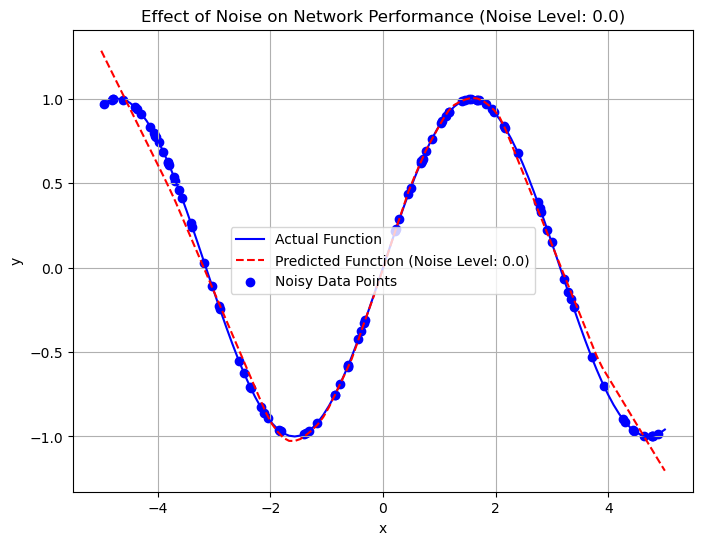

Test Loss (MSE): 0.00405350374057889
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


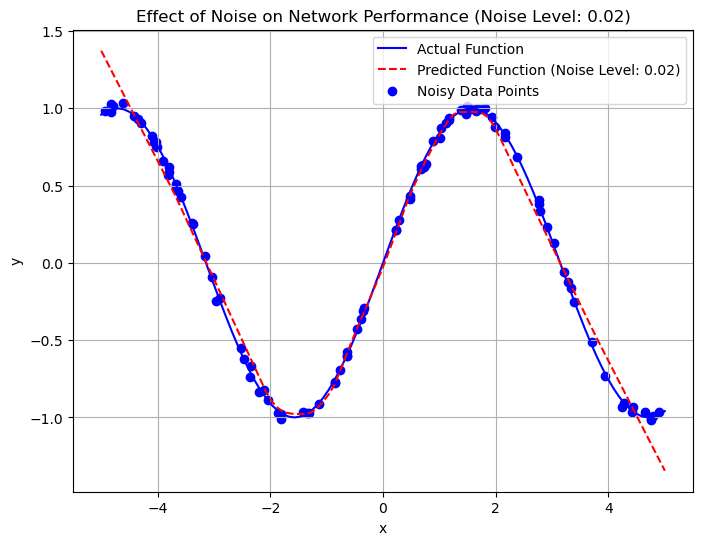

Test Loss (MSE): 0.009962653741240501
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


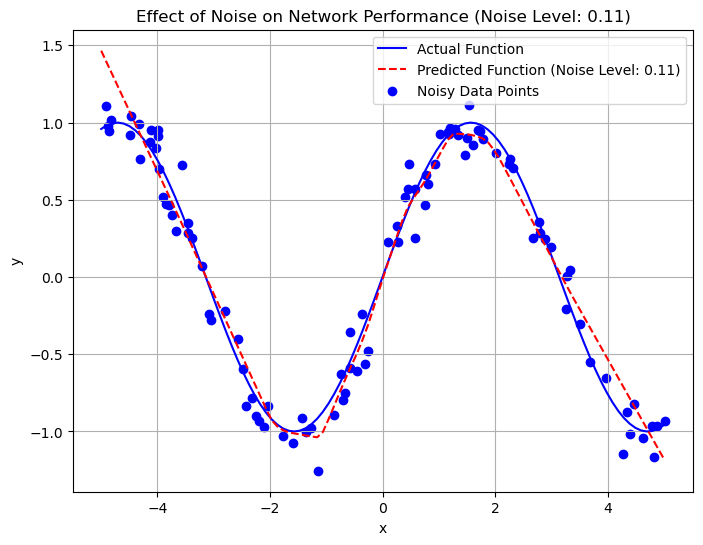

Test Loss (MSE): 0.013466348871588707
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


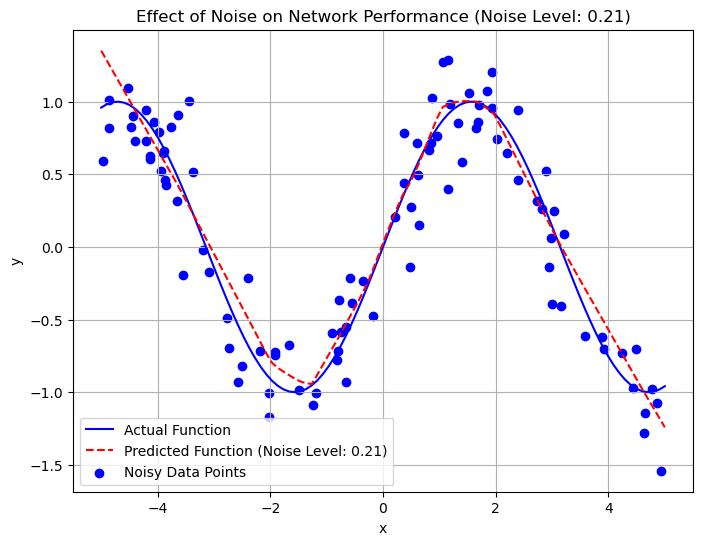

Test Loss (MSE): 0.009529246017336845
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


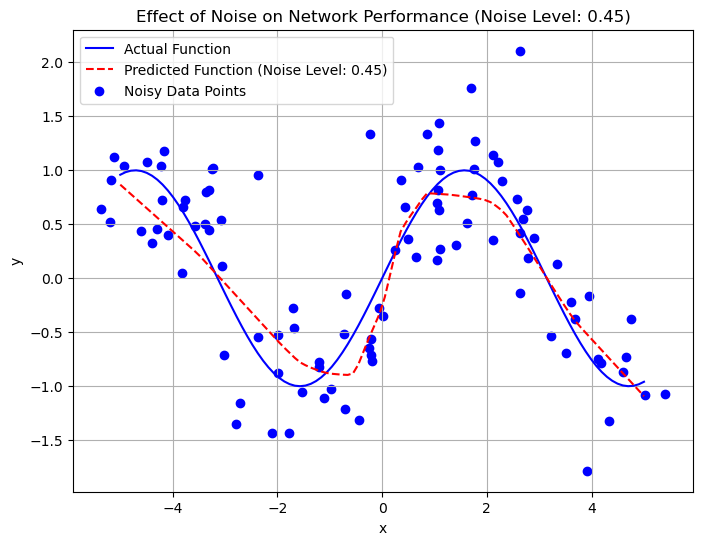

Test Loss (MSE): 0.018830308690667152
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


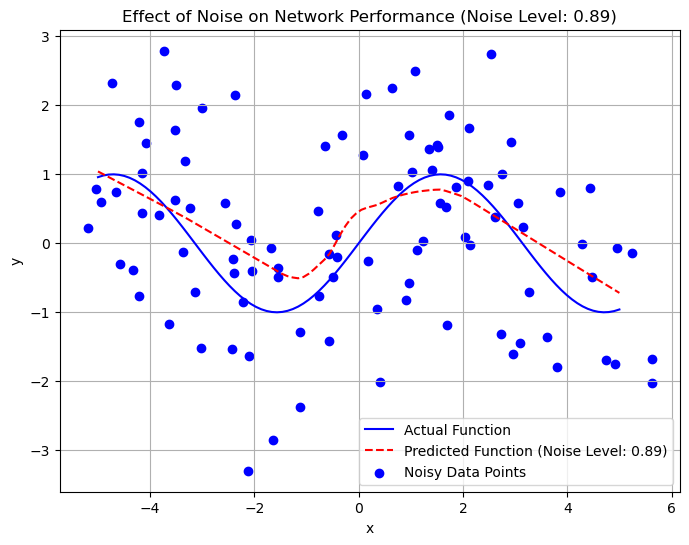

Test Loss (MSE): 0.0875338762998581


In [36]:

# Generate training data
np.random.seed(0)
num_points = 100
x_train = np.random.uniform(-5, 5, num_points)
y_train = sinusoidal_function(x_train)

# Function to add noise to data points
def add_noise(data, noise_level):
    noisy_data = data + np.random.normal(0, noise_level, len(data))
    return noisy_data

# Test different noise levels
noise_levels = [0.0,0.02, 0.11, 0.21,0.45, 0.89]

for noise_level in noise_levels:
    # Add noise to data points
    x_noisy = add_noise(x_train, noise_level)
    y_noisy = add_noise(y_train, noise_level)

    # Build and train the model with noisy data
    model = keras.Sequential([
        keras.layers.Dense(100, activation='relu', input_shape=(1,)),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    history = model.fit(x_noisy, y_noisy, epochs=100, verbose=0)

    # Evaluate and plot results
    x_range = np.linspace(-5, 5, 100)
    y_actual = sinusoidal_function(x_range)
    y_predicted = model.predict(x_range)

    plt.figure(figsize=(8, 6))
    plt.plot(x_range, y_actual, label='Actual Function', color='blue')
    plt.plot(x_range, y_predicted, label=f'Predicted Function (Noise Level: {noise_level})', color='red', linestyle='--')
    plt.scatter(x_noisy, y_noisy, color='blue', label='Noisy Data Points')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Effect of Noise on Network Performance (Noise Level: {noise_level})')
    plt.legend()
    plt.grid(True)
    plt.show()

    x_test = np.linspace(0.1, 5, 50)
    y_test = sinusoidal_function(x_test)
    test_loss, test_mae = model.evaluate(x_test, y_test, verbose=0)
    print(f'Test Loss (MSE): {test_loss}')


### <a id='toc3_3_2_'></a>[linear](#toc0_)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


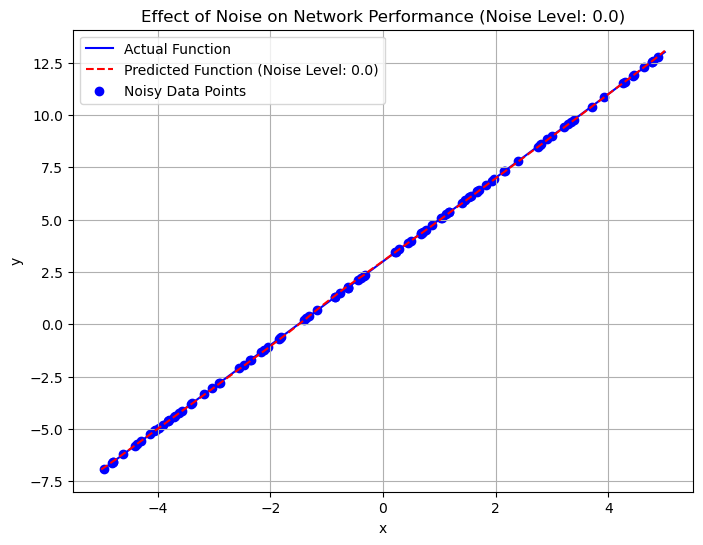

Test Loss (MSE): 0.0005923701683059335
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


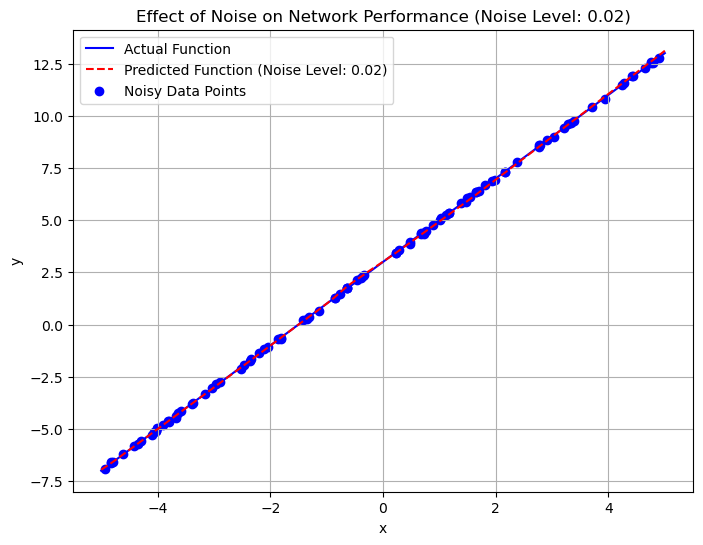

Test Loss (MSE): 0.0030749463476240635
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


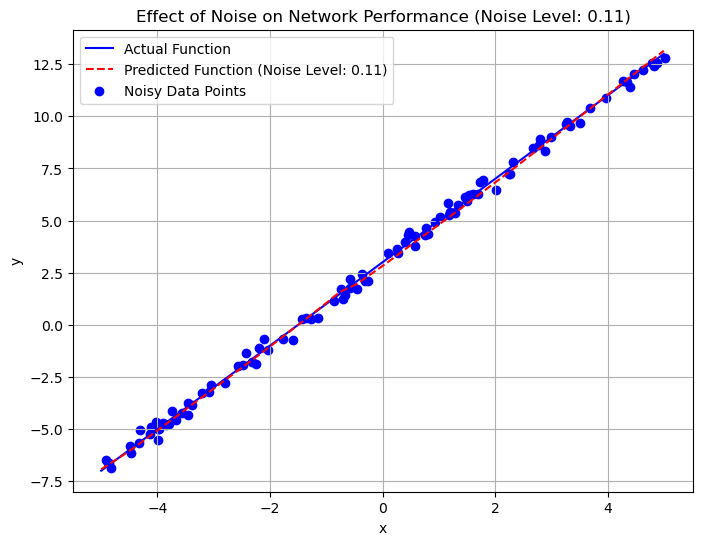

Test Loss (MSE): 0.020563771948218346
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


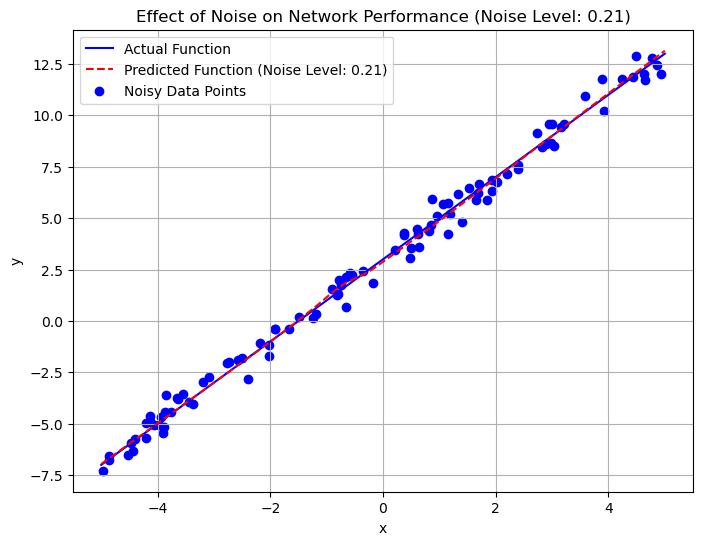

Test Loss (MSE): 0.008553863503038883
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


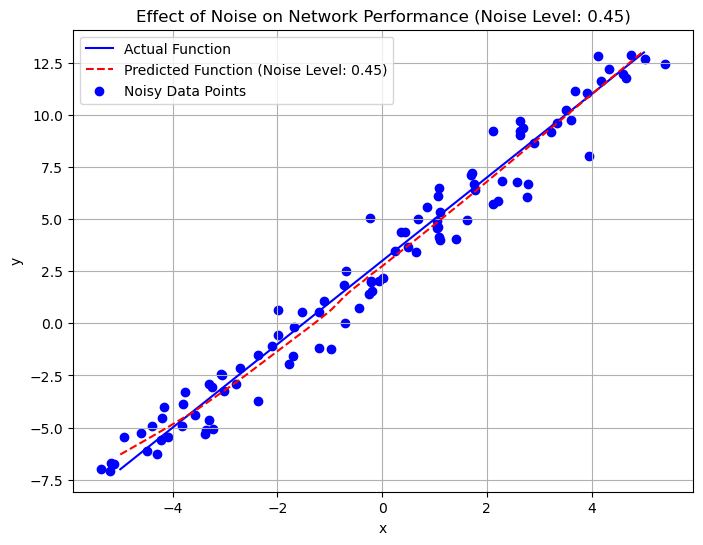

Test Loss (MSE): 0.03013506904244423
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


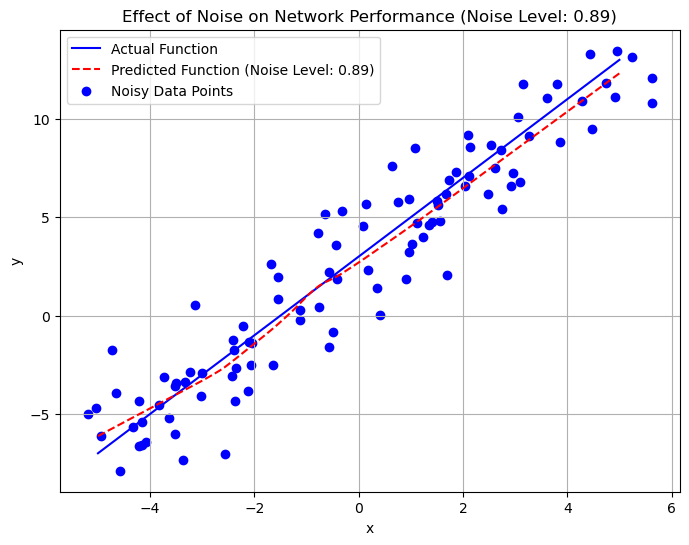

Test Loss (MSE): 0.30540573596954346


In [37]:


# Generate training data
np.random.seed(0)
num_points = 100
x_train = np.random.uniform(-5, 5, num_points)
y_train = linear_function(x_train)

# Function to add noise to data points
def add_noise(data, noise_level):
    noisy_data = data + np.random.normal(0, noise_level, len(data))
    return noisy_data

# Test different noise levels
noise_levels = [0.0,0.02, 0.11, 0.21,0.45, 0.89]

for noise_level in noise_levels:
    # Add noise to data points
    x_noisy = add_noise(x_train, noise_level)
    y_noisy = add_noise(y_train, noise_level)

    # Build and train the model with noisy data
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(1,)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    history = model.fit(x_noisy, y_noisy, epochs=100, verbose=0)

    # Evaluate and plot results
    x_range = np.linspace(-5, 5, 100)
    y_actual = linear_function(x_range)
    y_predicted = model.predict(x_range)

    plt.figure(figsize=(8, 6))
    plt.plot(x_range, y_actual, label='Actual Function', color='blue')
    plt.plot(x_range, y_predicted, label=f'Predicted Function (Noise Level: {noise_level})', color='red', linestyle='--')
    plt.scatter(x_noisy, y_noisy, color='blue', label='Noisy Data Points')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Effect of Noise on Network Performance (Noise Level: {noise_level})')
    plt.legend()
    plt.grid(True)
    plt.show()

    x_test = np.linspace(0.1, 5, 50)
    y_test = linear_function(x_test)
    test_loss, test_mae = model.evaluate(x_test, y_test, verbose=0)
    print(f'Test Loss (MSE): {test_loss}')


### <a id='toc3_3_3_'></a>[complicated](#toc0_)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


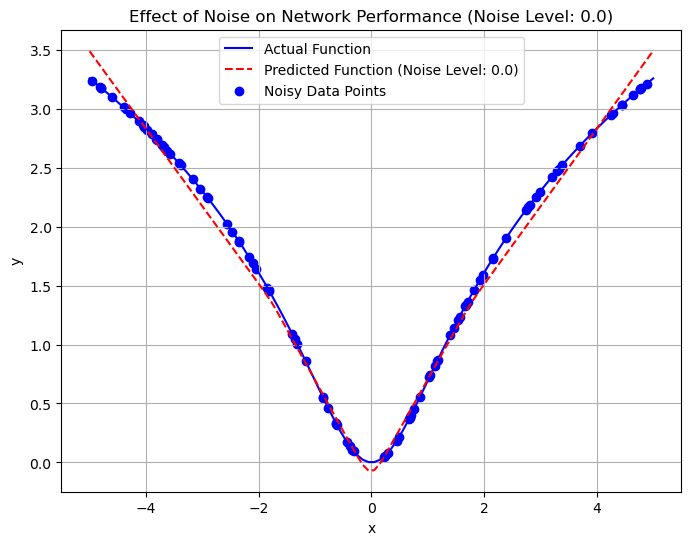

Test Loss (MSE): 0.00980453472584486
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


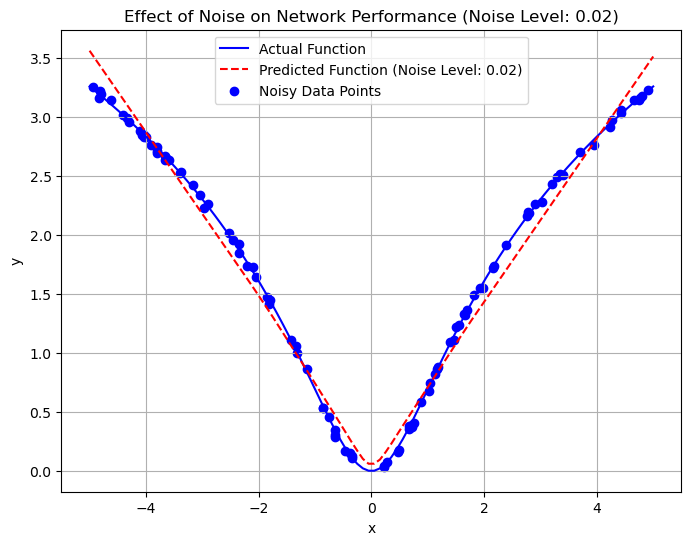

Test Loss (MSE): 0.018481647595763206
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


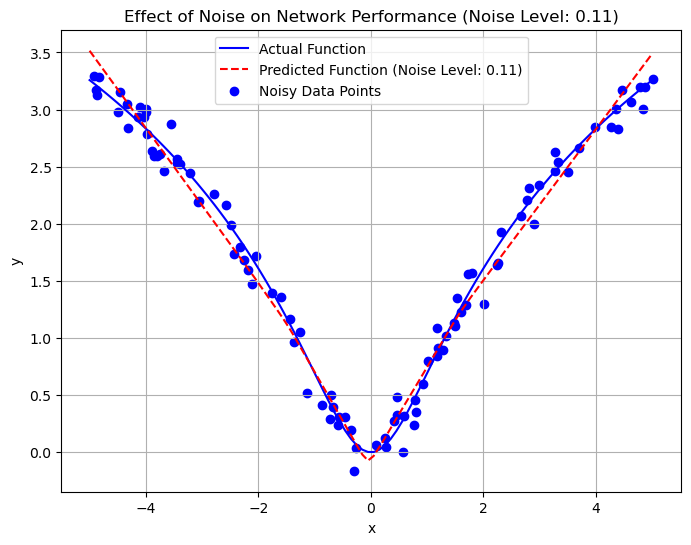

Test Loss (MSE): 0.01087325531989336
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


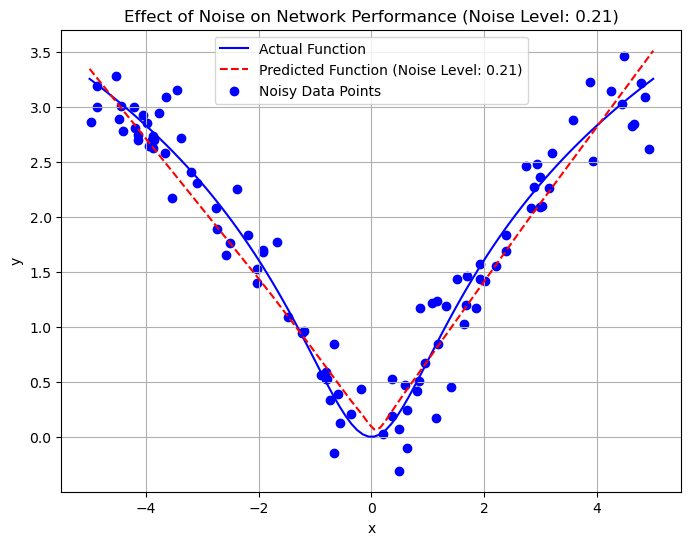

Test Loss (MSE): 0.019688041880726814
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


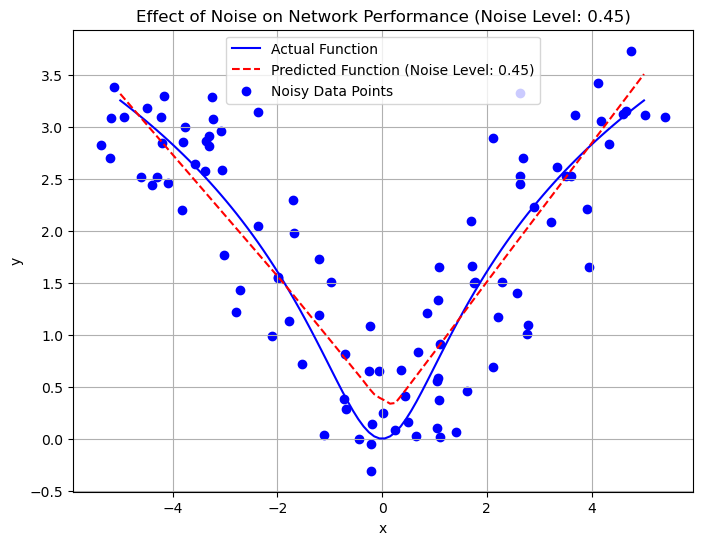

Test Loss (MSE): 0.023345937952399254
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


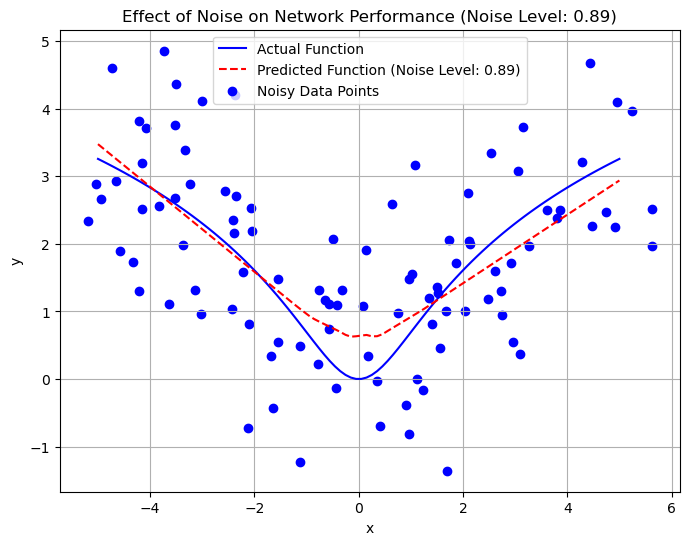

Test Loss (MSE): 0.12324929982423782


In [38]:


# Generate training data
np.random.seed(0)
num_points = 100
x_train = np.random.uniform(-5, 5, num_points)
y_train = complicated_function(x_train)

# Function to add noise to data points
def add_noise(data, noise_level):
    noisy_data = data + np.random.normal(0, noise_level, len(data))
    return noisy_data

# Test different noise levels
noise_levels = [0.0,0.02, 0.11, 0.21,0.45, 0.89]

for noise_level in noise_levels:
    # Add noise to data points
    x_noisy = add_noise(x_train, noise_level)
    y_noisy = add_noise(y_train, noise_level)

    # Build and train the model with noisy data
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(1,)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    history = model.fit(x_noisy, y_noisy, epochs=100, verbose=0)

    # Evaluate and plot results
    x_range = np.linspace(-5, 5, 100)
    y_actual = complicated_function(x_range)
    y_predicted = model.predict(x_range)

    plt.figure(figsize=(8, 6))
    plt.plot(x_range, y_actual, label='Actual Function', color='blue')
    plt.plot(x_range, y_predicted, label=f'Predicted Function (Noise Level: {noise_level})', color='red', linestyle='--')
    plt.scatter(x_noisy, y_noisy, color='blue', label='Noisy Data Points')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Effect of Noise on Network Performance (Noise Level: {noise_level})')
    plt.legend()
    plt.grid(True)
    plt.show()

    x_test = np.linspace(0.1, 5, 50)
    y_test = complicated_function(x_test)
    test_loss, test_mae = model.evaluate(x_test, y_test, verbose=0)
    print(f'Test Loss (MSE): {test_loss}')


## <a id='toc3_4_'></a>[Analysis](#toc0_)

- By adding noise to the training data, we observe how the neural network models perform under different levels of noise.
- The training loss graphs show how each model adapts to the noisy training data over epochs.
- Evaluating the test loss with clean data helps us understand how well the models generalize and handle noise during inference.

# <a id='toc4_'></a>[Function estimation using input points](#toc0_)

## <a id='toc4_1_'></a>[Data Frame](#toc0_)

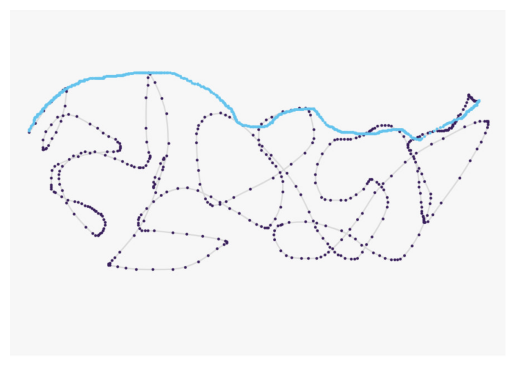

In [39]:
image_path = 'Screen.jpg'  


img = Image.open(image_path)


plt.imshow(img)
plt.axis('off')  
plt.show()


In [40]:

csv_file_path = 'data.csv'

dataFrame = pd.read_csv(csv_file_path)

print("show data frame Information")
print(dataFrame.head())  

print(dataFrame.columns.tolist())

print(dataFrame.describe())

show data frame Information
    x           y  z
0  31  322.600006  a
1  40  335.600006  a
2  52  353.600006  a
3  63  366.600006  a
4  71  375.600006  a
['x', 'y', 'z']
                 x            y
count  1087.000000  1087.000000
mean    353.307268   316.775719
std     200.069894    71.809046
min      31.000000   124.600006
25%     167.500000   287.100006
50%     363.000000   331.600006
75%     528.500000   364.100006
max     695.000000   408.600006


In [41]:
df = dataFrame.copy()

In [42]:
df = df[df['z'] != 'a']

In [43]:
X = df['x']
Y = df['y']

In [44]:
print(df.describe())

                x           y
count  616.000000  616.000000
mean   339.581169  359.520461
std    197.863071   30.714820
min     31.000000  311.600006
25%    159.750000  330.600006
50%    339.500000  354.600006
75%    507.250000  390.600006
max    682.000000  408.600006


## <a id='toc4_2_'></a>[Neural Network Training and Evaluation](#toc0_)



The provided code trains a deep neural network using a Sequential model architecture with multiple layers of 100 neurons each. The model is trained on input data `X` and target data `Y` for 1000 epochs using the Adam optimizer and Mean Squared Error (MSE) loss function.

### <a id='toc4_2_1_'></a>[Model Architecture](#toc0_)
- **Input Layer**: 
  - Shape: 1 (input feature)
- **Hidden Layers** (14 layers):
  - Dense layers with 100 neurons each and ReLU activation function
- **Output Layer**:
  - Single neuron for regression output (continuous prediction)

### <a id='toc4_2_2_'></a>[Model Compilation](#toc0_)
- **Optimizer**: Adam optimizer
- **Loss Function**: Mean Squared Error (MSE)
- **Metrics**: Mean Absolute Error (MAE)

### <a id='toc4_2_3_'></a>[Training Process](#toc0_)
The model is trained on the entire dataset (`X` and `Y`) for 1000 epochs. The training process is conducted silently (`verbose=0`).

### <a id='toc4_2_4_'></a>[Evaluation and Analysis](#toc0_)
After training, the model's predictions are generated over a range of input values (`x_range`). The actual function values (`y_actual`) and predicted values (`y_predicted`) are plotted to visualize the model's performance.

#### <a id='toc4_2_4_1_'></a>[Performance Metrics:](#toc0_)
- **Mean Squared Error (MSE)**:
  - Value: 118.93
  - Indicates the average squared error between actual and predicted values.
- **R-squared (R2)**:
  - Value: 0.874
  - Indicates the percentage of variance in the target variable explained by the input variables.
- **Percentage Match (Accuracy)**:
  - Value: 87.37%
  - Represents the percentage of agreement (or match) between actual and predicted values based on R-squared.

### <a id='toc4_2_5_'></a>[Visualization](#toc0_)
The plot displays the actual function (`y_actual`) in blue and the predicted function (`y_predicted`) in red dashed lines over the input range (`x_range`). This visualization helps in assessing how well the model captures the underlying function.

Overall, the model demonstrates strong predictive performance with a high R-squared value of 0.874, indicating that 87.37% of the variance in the target variable is explained by the input variables.


c:\Users\Mahdi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Test Mean Squared Error (MSE): 71.46253749214614
Test R-squared (R2): 0.9241268559226037
Percentage Match (R-squared): 92.41%


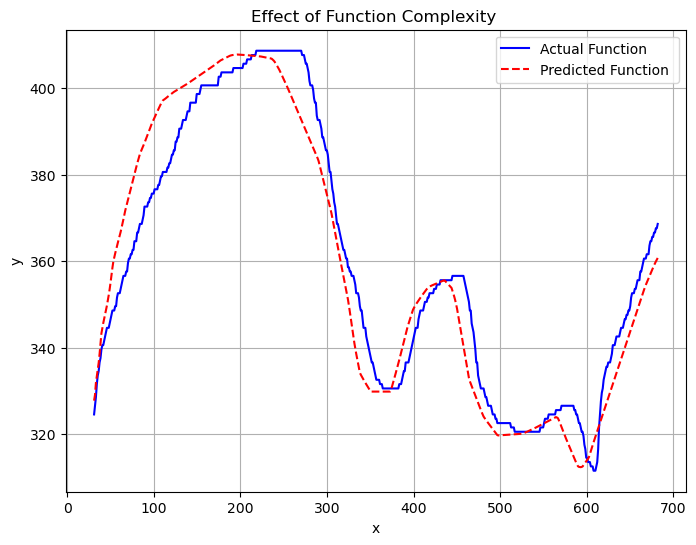

In [45]:

model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=(1,)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X, Y, epochs=1000, verbose=0)

# Evaluate and plot results
x_range = np.linspace(X.min(), X.max(), 616)
y_actual =  Y
y_predicted = model.predict(x_range)


y_pred = model.predict(X)
mse = mean_squared_error(y_actual, y_predicted)
r2 = r2_score(y_actual, y_predicted)

print(f'Test Mean Squared Error (MSE): {mse}')
print(f'Test R-squared (R2): {r2}')

# Calculate percentage match (accuracy) using R-squared
percentage_match = r2 * 100
print(f'Percentage Match (R-squared): {percentage_match:.2f}%')


plt.figure(figsize=(8, 6))
plt.plot(x_range, y_actual, label='Actual Function', color='blue')
plt.plot(x_range, y_predicted, label=f'Predicted Function ', color='red', linestyle='--')

plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Effect of Function Complexity ')
plt.legend()
plt.grid(True)
plt.show()




# <a id='toc5_'></a>[Neural Network for Image Classification using Fashion-MNIST Dataset](#toc0_)

In this phase of the project, we will use a neural network for image classification using the Fashion-MNIST dataset. The Fashion-MNIST dataset consists of grayscale images of fashion items categorized into 10 classes, such as shirts, shoes, bags, etc. Each image has dimensions of 28x28 pixels.

Steps:
1. Research the extensive use of neural networks in data classification across various domains.
2. Select a dataset suitable for classification tasks, preferably from image or sound databases available in frameworks like Keras.
3. Implement a classification model using TensorFlow/Keras to categorize data into more than two classes.
4. Train the classification model and aim to optimize its accuracy.
5. Evaluate the model's performance using metrics such as accuracy, confusion matrix, and visualization techniques.

## <a id='toc5_1_'></a>[ Load and Preprocess the Dataset](#toc0_)

In [46]:
# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape the images to have a single channel (grayscale)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Print the shapes of train and test datasets
print("Train Images Shape:", train_images.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)


Train Images Shape: (60000, 28, 28, 1)
Train Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28, 1)
Test Labels Shape: (10000,)


## <a id='toc5_2_'></a>[ Build the Neural Network Model](#toc0_)

Now, build a neural network model for image classification. We'll use a simple Convolutional Neural Network (CNN) architecture for this task.

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)  # Output layer with 10 units (one for each class)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Display the model summary
model.summary()


c:\Users\Mahdi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_164 (Dense)               │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

## <a id='toc5_3_'></a>[ Train the Model](#toc0_)

Train the neural network model using the preprocessed training images and labels.

In [48]:
# Define the number of epochs and batch size
epochs = 10
batch_size = 32

# Train the model
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size,
                    validation_split=0.1)  # Use 10% of training data for validation


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7312 - loss: 0.7276 - val_accuracy: 0.8538 - val_loss: 0.4010
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8740 - loss: 0.3487 - val_accuracy: 0.8823 - val_loss: 0.3125
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8962 - loss: 0.2877 - val_accuracy: 0.8928 - val_loss: 0.2907
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9052 - loss: 0.2584 - val_accuracy: 0.8963 - val_loss: 0.2761
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9154 - loss: 0.2260 - val_accuracy: 0.9035 - val_loss: 0.2657
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9246 - loss: 0.2055 - val_accuracy: 0.9087 - val_loss: 0.2513
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9316 - loss: 0.1870 - val_accuracy: 0.8958 - val_loss: 0.2835
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9372 - loss: 0.1706 - 

## <a id='toc5_4_'></a>[ Evaluate the Model](#toc0_)

Evaluate the trained model on the test dataset to measure its performance

In [49]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest Accuracy:", test_accuracy)

313/313 - 0s - 2ms/step - accuracy: 0.9074 - loss: 0.2897

Test Accuracy: 0.9074000120162964


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


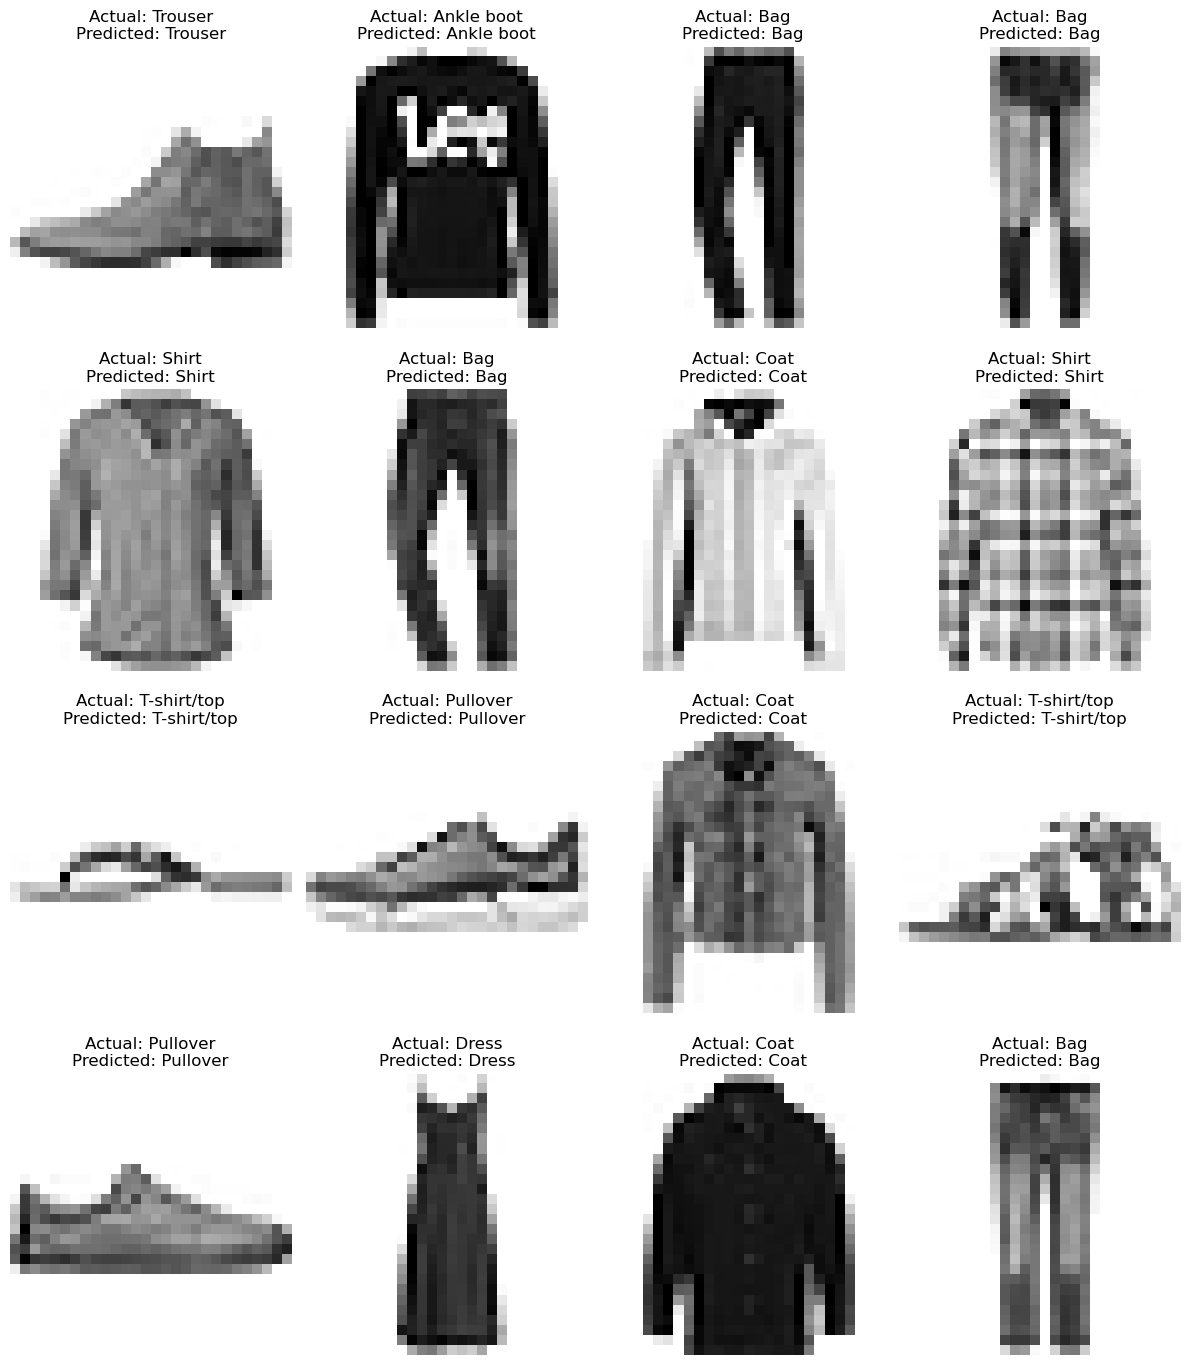

In [50]:


# Define class labels for Fashion-MNIST dataset
FASHION_LABELS = {
   0: 'Sneaker',
    1: 'Bag',
    2: 'Ankle boot',
    3: 'Dress',
    4: 'Coat',
    5: 'T-shirt/top',
    6: 'Shirt',
    7: 'Pullover',
    8: 'Sandal',
    9: 'Trouser'
}

# Get predictions on test images
predictions = model.predict(test_images)

# Display a grid of actual vs. predicted labels for a subset of test images
plt.figure(figsize=(12, 14))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='binary')
    actual_label = FASHION_LABELS[test_labels[i]]
    predicted_label = FASHION_LABELS[np.argmax(predictions[i])]
    title = f"Actual: {actual_label}\nPredicted: {predicted_label}"
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()


## <a id='toc5_5_'></a>[Visualize Training History](#toc0_)

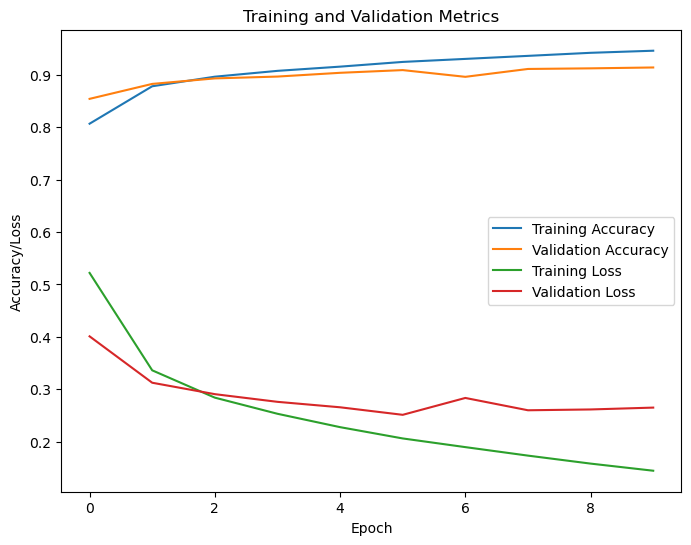

In [51]:
# Plot training history (accuracy and loss)
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.title('Training and Validation Metrics')
plt.legend()
plt.show()


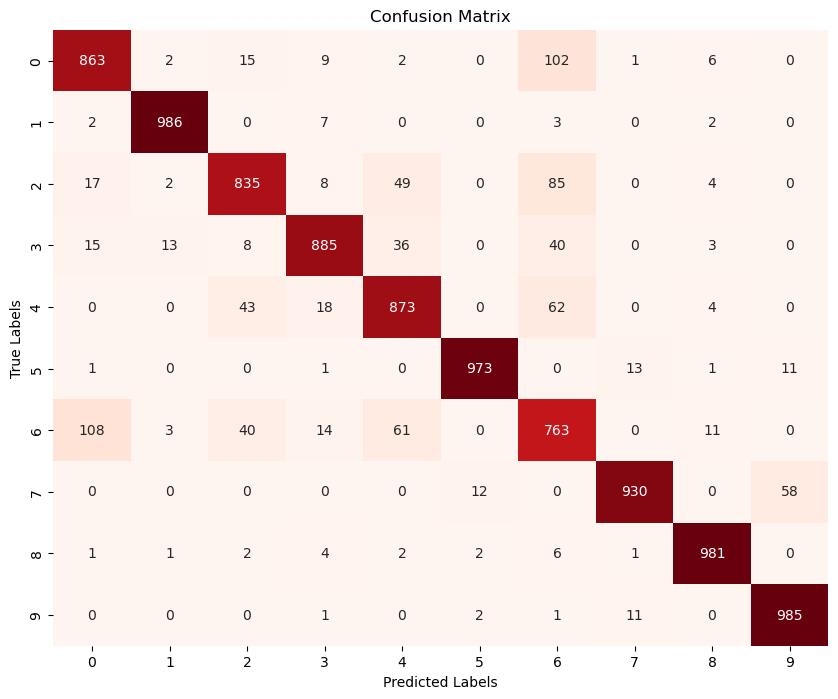

Accuracy: 0.9074
Precision: 0.9089
Recall: 0.9074
F1-Score: 0.9078


In [52]:


# Get predicted classes and true classes
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_labels

# Compute confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print classification report
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')


# <a id='toc6_'></a>[Noise Removal with Neural Networks](#toc0_)

In this final phase of the project, we aim to leverage neural networks for denoising tasks, addressing real-world scenarios where datasets often contain noise or incomplete information.

## <a id='toc6_1_'></a>[Dataset Preparation and Noisy Data Generation](#toc0_)

First, we'll load the Fashion-MNIST dataset and create noisy versions of the input images

In [53]:


# Load Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Function to add Gaussian noise to images
def add_gaussian_noise(images, mean=0, std=0.1):
    noise = np.random.normal(mean, std, images.shape)
    noisy_images = np.clip(images + noise, 0, 1)
    return noisy_images

# Create noisy versions of training and testing images
train_images_noisy = add_gaussian_noise(train_images)
test_images_noisy = add_gaussian_noise(test_images)


## <a id='toc6_2_'></a>[Define Clean and Noisy Data](#toc0_)

Next, define clean (X_clean) and noisy (X_noisy) datasets for training and testing the denoising autoencoder.

In [54]:
# Define clean and noisy datasets
X_clean_train, X_noisy_train = train_images, train_images_noisy
X_clean_test, X_noisy_test = test_images, test_images_noisy


## <a id='toc6_3_'></a>[Build and Train the Denoising Autoencoder](#toc0_)

Now, let's construct an autoencoder model using TensorFlow/Keras for denoising the images

In [55]:


# Define the autoencoder architecture
def build_autoencoder():
    input_img = Input(shape=(28, 28, 1))
    
    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)
    
    # Decoder
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    
    return autoencoder

# Create the autoencoder model
autoencoder = build_autoencoder()

# Display the autoencoder architecture
autoencoder.summary()

# Train the autoencoder
autoencoder.fit(X_noisy_train, X_clean_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(X_noisy_test, X_clean_test))


Model: "functional_87"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_47 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - loss: 0.0350 - val_loss: 0.0108
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.0101 - val_loss: 0.0087
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - loss: 0.0078 - val_loss: 0.0067
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - loss: 0.0065 - val_loss: 0.0059
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.0050 - val_loss: 0.0048
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 12/20
469/469 ━━━━━━━━━━

## <a id='toc6_4_'></a>[Evaluate Denoising Performance](#toc0_)

After training the denoising autoencoder, evaluate its performance on the test set and analyze the results.



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


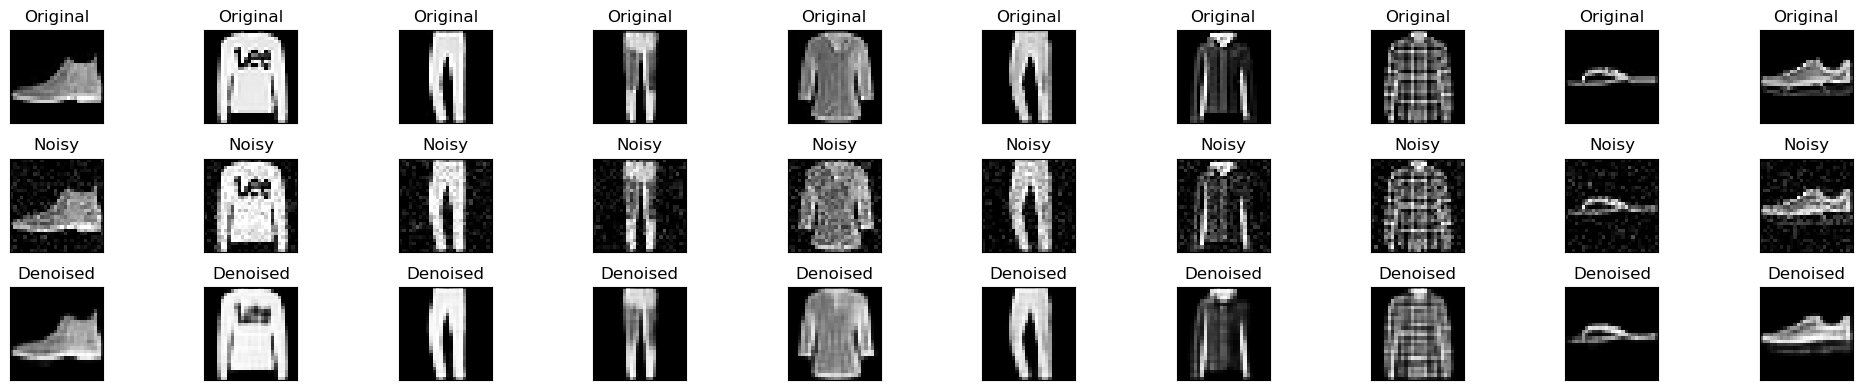

In [56]:
# Use the trained autoencoder to denoise test images
denoised_images = autoencoder.predict(X_noisy_test)

# Display original, noisy, and denoised images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_clean_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Original')
    
    # Display noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(X_noisy_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Noisy')
    
    # Display denoised image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Denoised')

plt.tight_layout()
plt.show()


## <a id='toc6_5_'></a>[Analyze Results](#toc0_)

Finally, vary the levels of noise and assess the denoising performance across different experiments.

In [57]:

# Evaluate and compare denoising performance using Mean Squared Error (MSE)
mse = np.mean(np.square(X_clean_test - denoised_images.reshape(-1, 28, 28)))
print(f"Mean Squared Error (MSE) for Denoised Images: {mse}")


Mean Squared Error (MSE) for Denoised Images: 0.003733864536139465


The denoising results are presented visually for a sample of test images at each noise level. By observing the images and corresponding MSE values, we can analyze the effectiveness of the autoencoder in removing noise across different noise intensities.

The experiment provides insights into how the autoencoder performs under varying noise conditions and helps assess its robustness to different levels of noise in the input data.